# <center>Διακριτή και Συνεχής Μέθοδος των ελαχίστων τετραγώνων / Discrete and Continuous Method of Least Squares και χρήση Εκθετικής και Κλασματικής Προσαρμογής δεδομένων (Regression) στην Διακριτή Μέθοδο ΕΛΤ </center>
## <center> Σύντομη θεωρία της μεθόδου και εφαρμογή της μέσω της $MATLAB$ και του NumPy module της Python </center>

Η προσέγγιση συναρτήσεων με ένα πολυώνυμο ειναί στενά συνδεδεμένη με την *πολυωνιμική παρεμβολή*; για παράδειγμα είχαμε δει την πολυωνυμική παρεμβολή κατα Lagrange (που δίνει το πολυώνυμο παρεμβολής σε μορφή Lagrange η σε μορφή Newton) από την οποία προκύπτει οτι το πολυώνυμο (**σε μορφή Lagrange**):
$$
p_n(x) = \sum^{n}_{i=0} \,l_i(x)y_i \nonumber
$$

ειναι το **μοναδικό** πολυώνυμο στο $\mathbb{R}_n[x]$ το οποίο επαληθεύει το σύνολο δεδομένων: $\{(x_0,y_0),(x_1,y_1),\dots,(x_{n},y_{n})\}$ δηλαδή για $i=0, \, 1, \dots, \, n$ έχουμε ότι: 

$$
p_n(x_i)=y_i \tag{1} \label{eq:1}
$$  

Αυτό γιατί οι συντελεστές $l_i(x) \, , \forall i$ ονομάζονται οι **συντελεστές παρεμβολής** και ορίζονται απο την σχέση:

$$
l_i(x)=\prod_{\substack{j=0 \\ j \neq i}}^n \frac{x-x_j}{x_i-x_j} \, \, , i = 0, 1, \dots, n \tag{2} \label{eq:2}
$$

Είναι φανερό τότε από την \eqref{eq:2} ότι όταν $x=x_i$ έχουμε ότι $l_i(x_i)=1$ λόγω της απαλοιφής του αριθμητή και του παρανόμαστή και έτσι προκύπτει η \eqref{eq:1}

Σε αυτό όμως το άρθρο θα επικεντρωθούμε στην _Μέθοδο των ελαχίστων τετραγώνων (Method of least squares - LSQ Method)_ όπου αποτελεί μέθοδος *προσεγγισης / παλινδρόμησης (regression)* μιας συνάρτησης; δηλαδή που προσεγγίζουμε την συνάρτηση με ένα πολυώνυμο κάποιου βαθμού, από το οποίο όμως *δεν* ζητάμε να επαληθεύει το σύνολο των δεδομένων ακριβώς. Αυτό μας επιτρέπει να αποφύγουμε κάποιες δυσκολίες που παρουσιάζονταν στην μέθοδο της πολυωνυμικής παρεμβολής, όπως τον όγκο των πράξεων που πρέπει να γίνουν για εύρεση αυτού του πολυωνύμου (αν και στην μορφή Newton αυτές απλοποιούνται δραματικά) ή τα προβλήματα που παρουσιάζονται όταν υπαρχεί noise στα δεδομένα μας, όπως λάθη και αποκλίσεις κατά την δειγματοληψία ενός τυχαίου δείγματος για παράδειγμα. Και εδώ είναι που προκύπτει η χρήση της μεθόδου ελαχίστων τετραγώνων όπου είναι η πιο συχνή μέθοδος για δημιουργία της "best-fit" προσέγγισης επι του συνόλου δεδομένων.

Στην ουσία προσπαθούμε να ελαχιστοποιήσουμε το άθροισμα των τετραγώνων των διαφορών μεταξύ των τεταγμένων των σημείων που θέλουμε να προσεγγίσουμε και της τιμής της προσεγγιστικής αυτής πολυωνυμικής συνάρτησης στην αντίστοιχη $x$-συντεταγμένη των σημείων. Αυτό λόγω του ότι η Ευκλείδια απόσταση μεταξύ δύο σημείων $(x_1,y_1) \, , (x_2,y_2)$ στο $\mathbb{R}^2$ (επικεντρωνόμαστε στην προσέγγιση συναρτήσεων *μίας πραγματικής μεταβλητής* όπου έχουν γράφημα στο $\mathbb{R}^2$) δίνεται από τον τύπο:

$$
d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2} \tag{3} \label{eq:3}
$$

Τώρα εάν έχουμε το σύνολο δεδομέων $\{(x_0,y_0),(x_1,y_1),\dots,(x_{n},y_{n})\}$ και έστω $g(x) = a_mx^m+a_{m-1}x^{m-1}+\dots+a_1x+a_0$ το προσεγγιστικό αυτό πολυώνυμο βαθμού m (όπου προφανώς $m\leq n-1$ καθώς εάν $m=n$ τότε πέρνουμε το πολυώνυμο παρεμβολής) τότε η μέθοδος των ελαχίστων τετραγώνων ουσιαστικά επιδιώκει την ελαχιστοποιήση όπως είπαμε του αθροίσματος, γνωστό και ως **συνάρτηση σφάλματος (error function)**:

$$
A=\sum_{i=0}^{n} (g(x_i)-y_i)^2 \tag{4} \label{eq:4} 
$$

H \eqref{eq:4} προκύπτει απο το γεγονός ότι θέλουμε να ελαχιστοποιήσουμε την απόσταση μεταξύ των σημείων $(x_i,g(x_i))$ και $(x_i,y_i)$; έστω αυτή η $d_i$, για $\forall \, i=0 \,, 1 \,, \dots, \, n$. Aπό την \eqref{eq:3} η απόσταση αυτή θα δίνεται από τον τύπο:

$$
d_i=|g(x_i)-y_i| \tag{5} \label{eq:5}
$$

Αξιοσημείωτη παρατήρηση σε αυτό το σημείο ειναι το γεγονός ότι στην \eqref{eq:4} προσπαθούμε να ελαχιστοποιήσουμε το τετράγωνο των διαφορών όμως η \eqref{eq:5} μας παραπέμπει στην ελαχιστοποιήση του αθροίσματος των *απολύτων τιμών* των $y$-συντεταγμένων. Αυτό γιατί υπάρχουν σημαντικά προτερήματα με το να χρησιμοποιήσουμε το τετράγωνο των διαφορών σε κάθε σημείο αντι την απόλυτη τιμή της διαφοράς (ή οποιοδήποτε άλλο μέγεθος που υπολογίζει το σφάλμα(error) μεταξύ της προσέγγισης και του συνόλου των δεδομένων). Αυτά είναι: 

1. Θετικές διαφορές *δέν* αναιρούν τις αρνητικές και το αντίθετο (κάτι που δεν βλέπουμε στην απόλυτη τιμή των διαφορών αλλα σε κάποιο άλλο μέγεθος που υπολογίζει το σφάλμα μεταξύ της προσέγγισης και του συνόλου των δεδομένων)
2. Η παραγώγιση είναι εύκολη (θα δούμε ότι θα χρειαστεί να υπολογίσουμε τις μερικές παραγώγους της \eqref{eq:4} ως προς του συντελεστές του πολυωνύμου $g(x)$); και τέλος
3. Μικρές διαφορές γινονταί μικρότερες και μεγάλες όλο και μεγαλύτερες λόγω του τετραγωνισμού

Πίσω στην \eqref{eq:4} τώρα και στην εύρεση μιας συστηματικής μεθόδου που θα μας επιτρέπει τον προσδιορισμό των συντελεστών του πολυωνύμου $g(x)$. Παρατηρούμε ότι αυτή ειναι στην πραγματικότητα συνάρτηση $m+1$ αγνώστων, καθώς η $g(x)$ είναι η άγνωστη - ζητούσα συνάρτηση, όπου οι μεταβλητές είναι οι συντελεστές του $g(x)$. Δηλαδή: $A \, = A(a_0, \, a_1,\dots, \, a_m)$. 

Για την ελαχιστοποίηση της $A(a_0, \, a_1,\dots, \, a_m)$ θα χρησιμοποιήσουμε ένα σημαντικό αποτέλεσμα του Διαφορικού Λογισμού;

Τα _"κρίσιμα σημεία"_ μιας συνάρτησης πολλαπλών μεταβλητών, είναι τα σημεία στα οποία μηδενίζεται η κλίση / gradient της συνάρτησης, σε αυτή την περίπτωση ειναι το σύνολο των σημείων $(\alpha_0, \, \alpha_1,\dots, \, \alpha_m)$ όπου $\nabla A(\alpha_0, \, \alpha_1,\dots, \, \alpha_m) = \vec{0}$. Τότε χρησιμοποιώντας το **"Κριτήριο του Sylvester"** μπορούμε να προσδιορίσουμε την φύση του κρίσημου αυτού σημείου στο $\mathbb{R}^{m+1}$ (χωρίς κάποιο περιορισμό, ψάχνουμε για του συντελεστές του $g(x)$ σε *όλο* το $\mathbb{R}^{m+1}$), δηλαδή εαν είναι *τοπικό μέγιστο* ή *τοπικό ελάχιστο*. Εμείς προσπαθούμε για την εύρεση των τοπικών **ελαχίστων**.

<hr style="border:2px solid gray"> </hr>

<span style="color:blue"> **Kριτήριο του Sylvester για Θετικά Ορισμένους Πίνακες** </span>
---

Έστω ο πίνακας $H := (h_{ij})_{i,j=1, \dots, \, n} \in \mathbb{R}^{n \times n}$ *συμμετρικός*. Για $\forall i=1, \, 2, \dots, \, n$ συμβολίζουμε με $\Delta_i$ την **ορίζουσα** του $i \times i$ τετραγωνικού υποπίνακα $M_i$ όπου: </span>

$$
M_i := (h_{kl})_{k,l=1, \dots, \, i} , \forall i=1, \, 2, \dots, \, n \nonumber
$$

Δηλαδή $\Delta_i = \det (M_i)$ όπου ο πίνακας $M_i$ δημιουργείται πέρνωντας των $i \times i$ τετραγωνικό υποπίνακα με πρώτο στοιχειο πάντα το $h_{11}$ από την *άνω-αριστερά* γωνία του πίνακα $H$. O πίνακας $M_i$ ονομάζεται ο *__κύριος ελάσσων (principal minor)__ πίνακας τάξης $i$* υποπίνακας του H.

Τότε με βάση το **Κριτήριο του Sylvester** έχουμε ότι:

$$
\text{O Η είναι θετικά ορισμένος} \Leftrightarrow \Delta_i>0 \, \, , \forall \, i=1 \,, 2 \,, \dots, \, n \nonumber             $$

<hr style="border:2px solid gray"> </hr>

Tώρα θα χρειαστεί να ορίσουμε την **Εσσιανή** μιας συνάρτησης καθώς και το **πολυώνυμο Taylor τάξης 2** μέσω του Θεωρήματος του Taylor για συναρτήσεις πολλαπλών μεταβλητών ώστε να καταλήξουμε με μια μεθοδολογία για προσδιορισμό των Τοπικών Ελαχίστων μια συνάρτησης πολλαπλών μεταβλητών και έτσι να κατανοήσουμε πραγματικά την Μέθοδο Ελαχίστων Τετραγώνων. 

<hr style="border:2px solid gray"> </hr>

H <span style="color:blue">**Εσσιανή**</span> μιας βαθμωτής συνάρτησης; $f(x_1, \, x_2, \dots, \, x_n): \mathbb{R}^n \longrightarrow \mathbb{R}$ συνάρτησης ορίζεται να είναι ο πίνακας μερικών παραγώγων </span>

\begin{equation*}
[Hf](\vec{x}) = \begin{pmatrix}
\frac{\partial^2f}{\partial x_1 \partial x_1}(\vec{x}) & \frac{\partial^2f}{\partial x_1 \partial x_2}(\vec{x}) & \cdots & \frac{\partial^2f}{\partial x_1 \partial x_n}(\vec{x}) \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2f}{\partial x_n \partial x_1}(\vec{x}) & \frac{\partial^2f}{\partial x_n \partial x_2}(\vec{x}) & \cdots & \frac{\partial^2f}{\partial x_n \partial x_n}(\vec{x}) \\
\end{pmatrix}
\end{equation*}
 
* Eάν τώρα η βαθμωτή συνάρτηση $f$ είναι αρκετά ομαλή στο (ανοικτό) πεδίο ορισμού της, στην ακρίβεια; $f \in \mathcal{C}^2(\mathcal{D}_f)$ τότε από το **Θεώρημα Ισότητας Μεικτών Παραγώγων**; $\frac{\partial^2f}{\partial x_i \partial x_j} = \frac{\partial^2f}{\partial x_j \partial x_i} \, , \, \forall i, \, j \in \{1, \, 2, \dots, \, n\}$ έχουμε ότι η Εσσιανή της $f$ είναι **συμμετρικός** πίνακας. Δηλαδή:

$$
[Hf](\vec{x}) = [Hf](\vec{x})^T \, , \, \forall \vec{x}\in\mathcal{D}_f \tag{Def 1.1} \label{eq:6}
$$

<hr style="border:2px solid gray"> </hr>

<span style="color:blue"> **Τύπος πολυωνύμου Taylor τάξης 2, από το Θεώρημα Taylor** </span>
___

Εάν η $f: A\subseteq\mathbb{R}^n \longrightarrow \mathbb{R}$ είναι
$\mathcal{C}^3(A)$ τότε $\forall \vec{x_ο}\in A$ εάν $\vec{x} = \vec{x_o} + \vec{h} , \  \vec{h} = (h_1, \cdots, \ h_n)$:


\begin{align*} 
f(\vec{x_o}+\vec{h})=f(\vec{x}) &= f(\vec{x_o}) + \sum_{i=1}^n \frac{\partial f}{\partial x_i}(\vec{x_o})h_i + \frac{1}{2} \sum_{i, j=1}^n \frac{\partial^2f}{\partial x_i \partial x_j}h_ih_j+\mathcal{R}_2(\vec{x}, \ \vec{x_o}) \ , \forall \vec{x}\in A \\
                                &\equiv f(\vec{x_o}) + \nabla f(\vec{x_o}) \cdot \vec{h} + \langle \vec{h} \cdot [Hf](\vec{x}), \ \vec{h} \rangle +\mathcal{R}_2(\vec{x}, \ \vec{x_o}) \ , \forall \vec{x}\in A \tag{Def 2.1} \label{eq:7} \\
\end{align*} 
όπου:

$$
\lim_{\vec{h}\to\vec{0}}\dfrac{|\mathcal{R}(\vec{x_o}+\vec{h},\vec{x_o})|}{\begin{Vmatrix} \vec{h} \end{Vmatrix}^2}=0 \nonumber
$$

Ονομάζουμε το    $\mathcal{T}(\vec{x_o}+\vec{h},\vec{h}) = f(\vec{x_o}) + \sum_{i=1}^n \frac{\partial f}{\partial x_i}(\vec{x_o})h_i + \frac{1}{2} \sum_{i, j=1}^n \frac{\partial^2f}{\partial x_i \partial x_j}h_ih_j$    **το πολυώνυμο Taylor τάξης 2 με κέντρο το $\vec{x_o} \in A$** και αποτελεί την *καλύτερη πολυωνυμικη προσέγγιση της $f$ στο $\vec{x_o} \in A$* 

Και εδώ είναι που καταλήγουμε στο **Κριτήριο της Εσσιανής** που είναι το πολυ-μεταβλητό ανάλογο του Κριτηρίου της 2ης παραγώγου που έχουμε στον Απειροστικό Λογισμό μίας μεταβλητής. Πρώτα μια διευκρύνηση πάνω στους *Θετικά ορισμένους πίνακες* / **Positive-Definite matrices**, που είδαμε στο Κριτήριο του Sylvester.

<hr style="border:2px solid gray"> </hr>

<span style="color:blue">  **Θετικά Ορισμένοι Πίνακες / Positive-Definite matrices** </span>
___

Ένας συμμετρικός, πραγματικός πίνακας $H \in \mathbb{R}^{n \times n}$ ονομάζεται **θετικά ορισμένος (positive-definite)** αν.ν.: 

$$
\vec{x}^TH\vec{x} > 0, \  \forall \vec{x} \in \mathbb{R}^n \smallsetminus \{\vec{0}\} \tag{Def 3.1} \label{eq:8}
$$

<hr style="border:2px solid gray"> </hr>

Θα χρησιμοποιήσουμε τώρα τον τύπο του Taylor τάξης 2 \eqref{eq:7}. Χ.Β.Γ., έστω ότι $\vec{x_o}$ είναι κρίσημο σημείο της βαθμωτής συνάρτησης $f$ και ότι αυτή είναι $\mathcal{C}^3$ στο $\mathcal{D}_f$. Άρα έχουμε ότι $\nabla f(\vec{x_o})=\vec{0}$. Οπότε, $\forall \vec{x} \in \mathcal{D}_f$ και $||\vec{h}||$ **μικρό**:


\begin{align}
f(\vec{x_o}+\vec{h})-f(\vec{x_o}) &= f(\vec{x})-f(\vec{x_o}) \nonumber \\ \nonumber
&= \mathcal{T}(\vec{x_o}+\vec{h}, \ \vec{x_o})+\mathcal{R}(\vec{x_o}+\vec{h}, \ \vec{x_o})-f(\vec{x_o}) && \because \eqref{eq:7} \\ \nonumber
&= \frac{1}{2}\langle \vec{h} \cdot [Hf](\vec{x}), \ \vec{h} \rangle + \mathcal{R}(\vec{x_o}+\vec{h}, \ \vec{x_o}) && \because \nabla f(\vec{x_o})=\vec{0} 
\end{align}


Άρα από το Θεώρημα του Taylor, \eqref{eq:7}, καθώς $\lim_{\vec{h}\to\vec{0}}\dfrac{|\mathcal{R}(\vec{x_o}+\vec{h},\vec{x_o})|}{\begin{Vmatrix} \vec{h} \end{Vmatrix}^2}=0$  και άρα $\vec{h} \neq \vec{0}$, εξ' ορισμού ορίου, τότε για $\vec{h}$ σε μια $\epsilon$-γειτονία του $\vec{0}$, δηλαδή $\vec{h} \to \vec{0} \Leftrightarrow ||\vec{h}|| \to 0$ τότε έχουμε ότι το μέγεθος $\langle \vec{h} \cdot [Hf](\vec{x}), \ \vec{h} \rangle$ **υπερισχυει κατα πολύ** του (*θετικού*) μεγέθους $\mathcal{R}(\vec{x_o}+\vec{h}, \ \vec{x_o})$ και άρα έχουμε ότι, εάν ο πίνακας $[Hf](\vec{x})$ είναι **θετικά οριμένος** τότε εξ' ορισμού: 


\begin{align}
\vec{h} \cdot [Hf](\vec{x}) \cdot \vec{h}^T &\equiv \langle \vec{h} \cdot [Hf](\vec{x}), \ \vec{h} \rangle > 0, \ \vec{h} \neq \vec{0}  &&\because \text{Η εσσιανή είναι θετικά ορισμένη} \nonumber \\  &\Rightarrow f(\vec{x_o}+\vec{h})-f(\vec{x_o})>0 \nonumber \\
&\Rightarrow f(\vec{x_o}+\vec{h})>f(\vec{x_o}) \nonumber \\
&\Rightarrow \vec{x_o} \ \text{είναι ΤΟΠΙΚΟ ΕΛΑΧΙΣΤΟ / T.Ε. / Absolute Minimum} \nonumber \\
\end{align}

Όποτε έχοντας το πιο πάνω Κριτήριο της Εσσιανής για τοπικά ακρότατα, τότε μπορούμε να ορίσουμε την πιο κάτω μεθολογία για εύρεση των τοπικών **ελαχιστων** (αναλόγως αναπτύσεται μέθοδος και για τα τοπικά μέγιστα) και κατ' επέκταση, μέθοδο εύρεσης της προσεγγιστικής συνάρτησης της Μεθοδου των Ελαχίστων Τετραγώνων.

<hr style="border:2px solid gray"> </hr>

1. Ορίζουμε την συνάρτηση: $A(a_0, \, a_1,\dots, \, a_m)=\sum_{i=1}^{n+1} (g(x_i)-y_i)^2$ ($\because \eqref{eq:4}$) όπου $a_i$ είναι οι συντελεστές του ζητούμενου πολυωνύμου; $g(x)$ βαθμού $m\leq n-1$ που θέλουμε να **προσεγγίζει** το σύνολο σημείων: $\{(x_0,y_0),(x_1,y_1),\dots,(x_{n},y_{n})\}$


2. Βρίσκουμε τις μερικές παραγώγους $\frac{\partial A}{\partial a_i}, \ \forall i=0, \ 1, \dots, \ m$ και επιλύουμε το σύστημα ($m+1$)-εξισώσεων:


$$
\left\{
    \begin{array} \\
    \frac{\partial A}{\partial a_0}=0 \\
    \frac{\partial A}{\partial a_1}=0 \\
    \vdots \\
    \frac{\partial A}{\partial a_m}=0
    \end{array}
\right. \nonumber \tag{Σ} \label{eq:9}  %We dont close the braces by having the period syntax instead of the "\}"
$$


3. Bρίσκουμε την **εσσιανή** της συνάρτησης $A(a_0, \, a_1,\dots, \, a_m)$, $[HA](\vec{x})$ και την υπολογίζουμε σε κάθε στοιχείου του συνόλου $\mathcal{S}$. Δηλαδή υπολογίζουμε τους πίνακες: $[HA](\vec{s_1}), \ \dots \ , \  [HA](\vec{s_l})$. <span style="color:red"> <em>Προφανώς καθώς το \eqref{eq:9} είναι ΤΕΤΡΑΓΩΝΙΚΟ <b>ΓΡΑΜΜΙΚΟ</b> σύστημα (ως προς τους συντελεστές του πολυωνύμου $g(x)$) τότε η Εσσιανή της συνάρτησης $A$ ΕΙΝΑΙ <b>ΠΑΝΤΑ Ο ΜΗΔΕΝΙΚΌΣ</b> ΠΊΝΑΚΑΣ. </em> </span> **Οπότε καθώς υπάρχει τουλάχιστον ένας κύριος ελάσσων πίνακας με μηδενική ορίζουσα τότε, το κριτήριο της Εσσιανής / του Sylvester δεν μπορει να χρησιμοποιηθεί!**
---
 
(<span style="color:green"> **EAN Η ΕΣΣΙΑΝΗ ΔΕΝ ΗΤΑΝ Ο ΜΗΔΕΝΙΚΟΣ ΠΙΝΑΚΑΣ:**</span>
    
<span style="color:green">* Mε το Κριτήριο του Sylvester βρίσκουμε τους πίνακες αυτούς οι οποιοί είναι θετικά ορισμένοι. Έστω, Χ.Β.Γ., ότι αυτόι είναι οι $[HA](\vec{\sigma_1}), \ \dots \ , \  [HA](\vec{\sigma_r})$ όπου $\{ \vec{\sigma_1}, \dots, \ \vec{\sigma_r} \} \subseteq \mathcal{S} = \{s_1, \dots, \ s_l\}$. Tότε με βάση το Κριτήριο της Εσσιανης το σύνολο $\{ \vec{\sigma_1}, \dots, \ \vec{\sigma_r} \}$ περιέχει τα σημεία στα οπόια η $A(a_0, \, a_1,\dots, \, a_m)$ παρουσιάζει τοπικό ελάχιστο.</span>

    
<span style="color:green">* Υπολογίζουμε τις παραστάσεις $A(\vec{\sigma_1}), \dots, \ A(\vec{\sigma_l})$. Εάν $\vec{\mu} = \min \{ A(\vec{\sigma_1}), \dots, \ A(\vec{\sigma_l}) \}$ τότε η τιμή $Α(\vec{\mu})$ είναι το **ΑΠΟΛΥΤΟ** ελάχιστο της συνάρτησης $A$.) </span>

---
**Όμως η ελάχιστη τιμή του αθροίσματος των τετραγώνων προκύπτει θέτοντας την κλίση της συνάρτησης του σφάλματος ίση με το $0$. Αυτό γίνεται εύκολα φανερό (αν και με καποιές πραξείς) στην περίπτωση της γραμμικής προσαρμογής Ελαχίστων Τετραγώνων, δηλαδή όταν, $m=1$. Τότε προκύπτει ότι:** 

$$
A(a_0,a_1)=(n+1)\overline{y^2}-2a_1(n+1)\overline{xy}-2a_0(n+1)\overline{y}+a_0^2(n+1)\overline{x^2}+2a_0a_1(n+1)\overline{x}+(n+1)a_0 \nonumber \\
\text{όπου,   } \overline{y^2}=\frac{y_0^2+\cdots+y_n^2}{n+1} \ , \ \overline{x^2}=\frac{x_0^2+\cdots+x_n^2}{n+1} \ , \ \overline{xy}=\frac{x_0y_0+\cdots+x_ny_n}{n+1} \ , \ \overline{y}=\frac{y_0+\cdots+y_n}{n+1} \ , \ \overline{x}=\frac{x_0+\cdots+x_n}{n+1} \nonumber
$$ 

Όμως το πιο πάνω είναι γράφημα ενός **παραβολοείδους** στο σύστημα αξόνων $\mathbf{O}_{a_0a_1A}$ με θετικούς συντελεστές στους όρους $a_0^2, a_1^2$, οπότε, στρέφει τα κοίλα του προς τα πάνω, δηλαδή είναι κυρτό γράφημα και άρα στο κρίσημο σημείο της η $A$, λόγω αυτής της γεωμετρικής απόδειξης, θα παρουσιάζει, απόλυτο **ελάχιστο**. Η πιο πάνω μεθοδολογια εφαρμόζεται και γενικά για $m \in \mathbb{N}$ και έτσι η ελάχιστη τιμή του αθροίσματος των τετραγώνων προκύπτει θέτοντας την κλίση της συνάρτησης του σφάλματος ίση με το $0$ για κάθε τιμή του $m$.
 
3. Επιλύουμε το ανωτέρω σύστημα, \eqref{eq:9}, είτε με απαλοιφή Gauss είτε με την μέθοδο του Cramer και βρίσκουμε, εάν ο πίνακας συντελεστών του συστήματως **δεν** ειναι ιδιάζων, την μοναδική του λύση $\vec{\mu}=(\mu_0 \dots, \ \mu_m) \in \mathbb{R}^{m+1}$

Έστω το σύνολο λύσεων του συστήματος \eqref{eq:9}; $\mathcal{S}=\{\vec{\alpha} \in \mathbb{R}^{m+1}: \vec{\alpha} \text{ είναι λύση του συστήματος } \eqref{eq:9} \} = \{s_1, \dots, \ s_l\}$. Εάν $|\mathcal{S}|=1$ με μοναδικό στοιχείο το $\vec{\mu}$:

4. Εάν, $\vec{\mu}=(\mu_0 \dots, \ \mu_m) \in \mathbb{R}^{m+1}$ τότε το πολυώνυμο:
$$
g(x) = \mu_mx^m+\mu_{m-1}x^{m-1}+\cdots+\mu_1x+\mu_0 \ , \  \text{είναι το ζητούμενο προσεγγιστικό πολυώνυμο} \nonumber
$$ 


<hr style="border:2px solid gray"> </hr>

Αφότου είδαμε την γενική περίπτωση της μεθόδου των ελαχίστων τετραγώνων, εας δούμε τώρα κάποια πρακτικά παραδείγματα, με βάση την πιο πάνω γενική μεθοδολογία, μαζί με προσομοιώσεις και γεωμετρικές απεικονίσεις με την βοήθεια της $MATLAB$ και της Python. Για την ακρίβεια, παραδείγματα τα οποία επικαλόνται μιας λογικής σειράς επίλυσης και κατανόησης θα τα επιλύουμε με την χρήση της Python, καθώς αυτό το paper δημιουργήθηκε σε $Jupyter \ Notebook$ το οποίο προσφέρει interactive Python console και την δυνατότητα επεξεργασίας κώδικα καθώς και την παρουσίαση γραφημάτων της Matplotlib, inline.

<hr style="border:3px solid black"> </hr>

## Παράδειγμα 1: Έστω τα δεδομένα $(1, 2.5), \ (3, 3.5), \ (5, 6.35) \text{ και } (7, 8.1), \ (n=3)$. Tα απεικονίζουμε με τον πιο κάτω κώδικα:

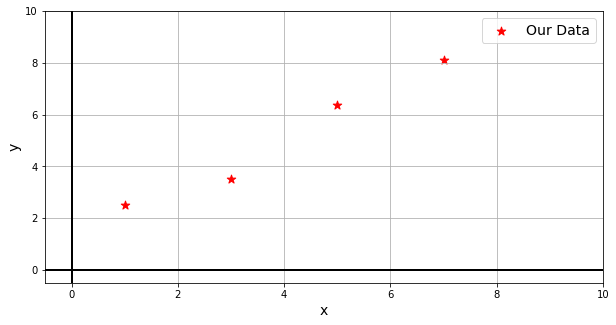

In [1]:
%matplotlib inline
%config InlineBachend.figure_format='svg' #saving the figure in vector graphics format for better quality

import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 3, 5, 7], int)
y = np.array([2.5, 3.5, 6.35, 8.1], float)

# Creating the plot and editing some of its attributes for clarity. We will just copy and paste them for future use.
# We also assign every modification to our plot to a dummy/garbage collecting variable; '_' to prevent unwanted outputs

_ = plt.figure(figsize=(10,5))
_ = plt.scatter(x,y , marker='*', c='red', s=80, label='Our Data')
_ = plt.xlabel('x', fontsize=14)
_ = plt.ylabel('y', fontsize=14)
_ = plt.grid(True)
axes = plt.gca() #gca stands for get current axes
axes.set_xlim([-0.5,10])
axes.set_ylim([-0.5,10])
_ = plt.rcParams['xtick.labelsize']=18
_ = plt.rcParams['ytick.labelsize']=18 
_ = plt.legend(loc='best', fontsize=14) #Sets the legend box at the best location
_ = plt.axhline(0, color='black', lw=2)
_ = plt.axvline(0, color='black', lw=2)

_ = plt.show

Παρατηρούμε, για καλή μας τύχη, ότι τα δεδομένα μας μπορούν να προσεγγιστούν με ικανοποιητική ακρίβεια από μια εξίσωση ευθείας, δηλαδή απο ένα πολυώνυμο βαθμού 1. Έστω αυτό είναι το $g(x)=ax+b$. Όπως είπαμε και στην θεωρία μας, οι συντελέστες αυτού του πολυωνύμου, $a, \ b$ είναι οι αριθμοί οι οποιοί ελαχιστοποιούν την ακόλουθη παράσταση:

\begin{align}
A(a,b) &= (g(x_1)-y_1)^2+(g(x_2)-y_2)^2+(g(x_3)-y_3)^2+(g(x_4)-y_4)^2 \nonumber \\
       &= (ax_1+b-y_1)^2+(ax_2+b-y_2)^2+(ax_3+b-y_3)^2+(ax_4+b-y_4)^2 \nonumber \\
\end{align}

Βρίσκουμε τωρα τα κρίσημα σημεία της συνάρτησης αυτής, υπολογίζοντας αρχικά τις μερικές παραγώγους της συνάρτησης $A$ ως προς $a$ και ως προς $b$ και έπειτα λύνωντας το σύστημα: $\frac{\partial A}{\partial a}=0 \text{ και } \frac{\partial A}{\partial b}=0$. Έχουμε:


\begin{align}
\frac{\partial A}{\partial a} &= 2[x_1(ax_1+b-y_1)+x_2(ax_2+b-y_2)+x_3(ax_3+b-y_3)+x_4(ax_4+b-y_4)] \nonumber \\
                              &= 2[a(x_1^2+x_2^2+x_3^2+x_4^2)+b(x_1+x_2+x_3+x_4)-(x_1y_1+x_2y_2+x_3y_3+x_4y_4)] \ = \ 0 \nonumber \\ \tag{Ex. 1.1} \label{eq:10}
\end{align} 

\begin{align}
\frac{\partial A}{\partial b} &= 2[(ax_1+b-y_1)+(ax_2+b-y_2)+(ax_3+b-y_3)+(ax_4+b-y_4)] \nonumber \\
                              &= 2[a(x_1+x_2+x_3+x_4)+4b-(y_1+y_2+y_3+y_4)] \ = \ 0 \nonumber \\
\tag{Ex. 1.2} \label{eq:11}
\end{align} 

Tώρα ορίζοντας τις πιο κάτω ποσότητες:

$$
\mathcal{S}_{xx}=\sum_{i=1}^4x_i^2, \ \mathcal{S}_{x}=\sum_{i=1}^4x_i, \ \mathcal{S}_{xy}=\sum_{i=1}^4x_iy_i, \ \mathcal{S}_{y}=\sum_{i=1}^4y_i \nonumber
$$

το σύστημα εξισώσεων \eqref{eq:10} και \eqref{eq:11}, γνωστες και ως οι **κανονικές εξισώσεις των δεδομένων (normal equations)** του συνόλου δεδομένων, μετατρέπεται στο **ισοδύναμο** ομοιογενές γραμμικό σύστημα:

$$
\left\{
\begin{array} \\
a\mathcal{S}_{xx}+b\mathcal{S}_{x}=\mathcal{S}_{xy} \\
a\mathcal{S}_{x}+4b=\mathcal{S}_{y} \\
\end{array}
\right. \nonumber \\
\Updownarrow \\
\mathbf{S}
\cdot
\begin{pmatrix}
a \\
b \\
\end{pmatrix}
\ = \
\begin{pmatrix}
\mathcal{S}_{xy} \\
\mathcal{S}_{y} \\
\end{pmatrix}
\equiv
\begin{pmatrix}
\mathcal{S}_{xx} & \mathcal{S}_{x} \\
\mathcal{S}_{x} & 4 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
a \\
b \\
\end{pmatrix}
\ = \
\begin{pmatrix}
\mathcal{S}_{xy} \\
\mathcal{S}_{y} \\
\end{pmatrix}
$$

Τώρα εάν ο πίνακας $\mathbf{S}$ είναι **αντιστρέψιμος**, δηλαδή $4\mathcal{S}_{xx}-\mathcal{S}_{x}^2 \neq 0$, όπως γνωρίζουμε από την Γραμμική Άλγεβρα το ανωτέρο γραμμικο σύστημα έχει **μοναδική** λύση η οποία, από απαλοιφή Gauss ή απο μέθοδο του Cramer προκύπτει να είναι η:

$$
a=\frac{4\mathcal{S}_{xy}-\mathcal{S}_{x}\mathcal{S}_{y}}{4\mathcal{S}_{xx}-\mathcal{S}_{x}^2}, \ \ b=\frac{\mathcal{S}_{xx}\mathcal{S}_{y}-\mathcal{S}_{xy}\mathcal{S}_{x}}{4\mathcal{S}_{xx}-\mathcal{S}_{x}^2} \nonumber
$$

Για την *γραμμική εκδοχή της Μεθόδου Ελαχίστων Τετραγώνων* θα δημιουργήσουμε συναρτήση στην $MATLAB$ όπου επιστρέφει τους συντελεστές $a, \ b$ του πολυωνύμου $g(x)=ax+b$ όπου αποτελεί την **γραμμική προσέγγιση ελαχίστων τετραγώνων των δεδομένων (σε arrays/vectors)**, $\vec{x}, \ \vec{y}$. Στα NumPy & SciPy module της Python ήδη υπάρχει η built-in συνάρτηση **lstsq()** όπου κάνει αυτή ακριβώς την δουλειά για εμάς. Aρχικά ας γράψουμε μια συνάρτηση σε ένα m-file όπου για ένα τυχαίο δείγμα δεδομένων $\vec{x}, \ \vec{y}$ μεγέθους n θα μας επιστρέφει το γραμμικό πολυώνυμο ελαχίστων τετραγώνων (σε array μορφη στην $MATLAB$), $g(x)$.

<hr style="border:2px solid gray"> </hr>

### Our $MATLAB$ function 

function [a,b] = lin_lsq(x,y)

 % This function returns the coefficients of the linear regression of the given input data, x and y, in row or column vector

 % form. It implements the linear version of the Method of Least Squares. It also displays a table where each row contains the

 % x and y coordinates of the data, the linear function of the method of LSQ evaluated at that point and the absolute error of 

 % the best-fit linear function and the data. We also display the total squared error at the end.

n = length(x); % **SOS THIS n IS THE ACTUAL SIZE OF OUR DATA SET. THAT MEANS IT IS EQUIVALENT TO n+1 IN OUR THEORY OVERVIEW ABOVE**

x = x(:); y = y(:); % We make the data into column vectors, incase they were given otherwise. We dont use the transpose syntax

              % in case the given vector where already in column vector form

s_x = sum(x); s_xx = sum(x.^2); s_y = sum(y); s_xy = sum(x.*y);

a = (n*s_xy-s_x*s_y)/(n*s_xx-s_x*s_x);

b = (s_xx*s_y-s_xy*s_x)/(n*s_xx-s_x*s_x); 

table = [x, y, (a*x+b), y-(a*x+b)];

disp('|     x     |     y     |   g(x_i)  | y_i-(a*x_i+b) |')

disp('-----------------------------------------------------')

disp(sprintf('|%8.3f \t|%8.3f \t|%9.3f \t|%11.3f \t| \n',table')) % fprintf = disp(sprintf(...)) and we also have the transpose of table
 
 % because sprintf iterates through arrays column by column instead of row by row

%because sprintf iterates column by column we use the transpose of the

%table matrix for the correct output of our table

sq_err = sum(table(:,4).^2);

disp(['The total squared error is ', num2str(sq_err)]);

### Output (we will print it through Python's IPython module, Image function)

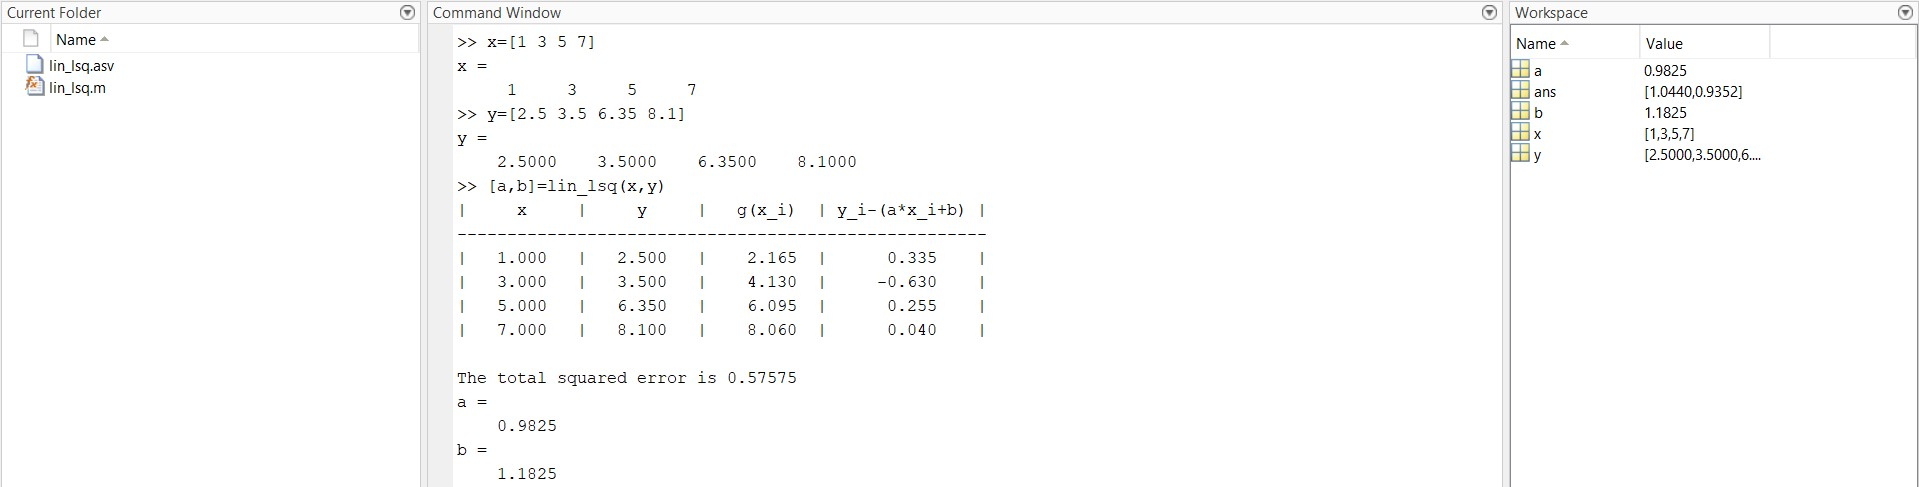

In [2]:
from IPython.display import Image
Image(filename ="lin_lsq_output.png", width=1280, height=720)

<hr style="border:2px solid gray"> </hr>

### Creating an equivelant Python function and visualising the linear approximation of the LSQ Method compared to the data set

<hr style="border:2px solid gray"> </hr>

|    x    |    y    |   g(x)  |   y-g(x) | 
 ----------------------------------------
|   1.00  |   2.50  |   2.17  |    0.33  |
|   3.00  |   3.50  |   4.13  |   -0.63  |
|   5.00  |   6.35  |   6.09  |    0.25  |
|   7.00  |   8.10  |   8.06  |    0.04  |
Also the total squared error is 0.58 

The coefficients of the linear polyonomial of the Method of LSQ are: a = 0.98 and b = 1.18


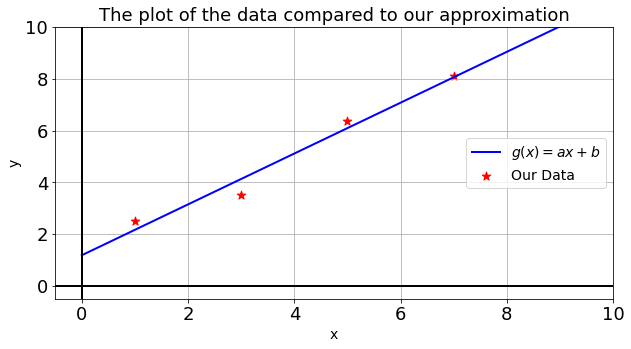

In [19]:
%matplotlib inline
#saving the figure in vector graphics format for better quality
%config InlineBachend.figure_format='svg' 


import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA

def lin_lsq(x,y):
    """
    This function returns the coefficients of the linear regression AND the corresponding linear polyonomial
    of the given input data, x and y, in row or column vector form. It implements the linear version of the Method 
    of Least Squares. It also displays a table where each row contains the x and y coordinates of the data, the 
    linear function of the method of LSQ evaluated at that point and the absolute error of the best-fit linear 
    function and the data. We also display the total squared error at the end.
    """
    n = np.prod(x.shape)
    x = x.reshape(n,1) #if given otherwise, we turn x and y vectors to column vectors
    y = y.reshape(n,1)
    s_x = np.sum(x); s_xx = np.sum(x**2); s_y = np.sum(y); s_xy = np.sum(x*y)
    S = np.array([[s_xx, s_x], [s_x, 4]], float)
    d = np.array([s_xy, s_y], float)
    try:
        S_inv = LA.inv(S) # if LA.det(S)=0 then a LinAlgError exception will be raised
    except LA.LinAlgError:
        print("""With the given data, the system of normal equations of the Method of LSQ, does not have or 
                 has infinite solutions because the coefficient matrix, S, is singular, i.e. it doesnt have an inverse.""")
        return None
    else:
        sol = LA.solve(S,d)
        a = sol[0]; b = sol[1]
        g = np.poly1d([a,b])
        g_x = g(x)
        err = y-g_x
        print('|    x    |    y    |   g(x)  |   y-g(x) | \n ----------------------------------------')
        table = np.concatenate((x, y, g_x, err), axis=1)
        for (x_i, y_i, g_xi, err_i) in table:
            print(f'|  {x_i:5.2f}  |  {y_i:5.2f}  |  {g_xi:5.2f}  |  {err_i:6.2f}  |')
        print(f"Also the total squared error is {sum(err**2)[0]:.2f} \n")
        return (a,b), g


x = np.array([1, 3, 5, 7], int)
y = np.array([2.5, 3.5, 6.35, 8.1], float)
(a,b), g = lin_lsq(x,y)
print(f"The coefficients of the linear polyonomial of the Method of LSQ are: a = {a:.2f} and b = {b:.2f}")
t = np.linspace(0,10, num=1000)
g_t = g(t)

# Creating the plot and editing some of its attributes for clarity. We will just copy and paste them for future use.
# We also assign every modification to our plot to a dummy/garbage collecting variable; '_' to prevent unwanted outputs
_ = plt.figure(figsize=(10,5))
_ = plt.scatter(x, y , marker='*', c='red', s=80, label='Our Data')
_ = plt.plot(t, g_t, c='blue', linewidth='2.0', label=r'$g(x)=ax+b$')
_ = plt.xlabel('x', fontsize=14)
_ = plt.ylabel('y', fontsize=14)
_ = plt.grid(True)
axes = plt.gca() #gca stands for get current axes
axes.set_xlim([-0.5,10])
axes.set_ylim([-0.5,10])
_ = plt.rcParams['xtick.labelsize']=18
_ = plt.rcParams['ytick.labelsize']=18 
_ = plt.legend(loc='best', fontsize=14) #Sets the legend box at the best location
_ = plt.axhline(0, color='black', lw=2)
_ = plt.axvline(0, color='black', lw=2)
_ = plt.title("The plot of the data compared to our approximation", 
              {'fontsize': 18,
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'center'} )

_ = plt.show

*Βλέπουμε απο τα αποτελέσματα της Python και της MATLAB ότι, με ακρίβεια 2 δεκαδικών ψηφίων, οι 2 εκδοχές της Μεθόδου LSQ επιφέρει και στα 2 προγράμματα / προσομοιώσεις το ίδιο αποτέλεσμα. Στην Python, όπως είχαμε προαναφέρει, θα μπορούσαμε να χρησιμοποιήσουμε απευθείας την συνάρτηση lstsq() του NumPy ή SciPy module αντί για την lin_lsq() που εμείς δημιουργήσαμε.*

<hr style="border:2px solid gray"> </hr>

## Παράδειγμα 2: Τετραγωνικές και κυβικές προσεγγίσεις της Μεθόδου Ελαχίστων Τετραγώνων

Με την ίδια μεθοδολογία που αναπτύξαμε πριν φτάσουμε στα παραδειγματα και που εφαρμόσαμε στο *Παράδειγμα 1*, θα δούμε την μεθοδολογία για να προσεγγίσουμε ένα σύνολο δεδομένων $\{(x_0,y_0),(x_1,y_1),\dots,(x_{n},y_{n})\}$, με πολυώνυμα βαθμού 2 (**Quadratic Least Squares Approximation**) και βαθμού 3 (**Cubic Least Squares Approximation**) (Στην περίπτωση όπου $n=3$ τότε το πολυώνυμο που προκύπτει από την Κυβική προσέγγιση ελαχίστων τετραγώνων *είναι* το πολυώνυμο παρεμβολής του Legendre, λόγω μοναδικότητας και καθώς m=n (βλέπε **Παράδειγμα 2.1** και \eqref{eq:1}) και όταν $n=2$, το πολυώνυμο που προκύπτει απο την Τετραγωνική προσέγγιση ελαχίστων τετραγώνων *είναι* το πολυώνυμο παρεμβολής του Legendre). Άρα θα δούμε τις περιπτώσεις όπου $m=2$ και $m=3$, αντίστοιχα. (στο *Παράδειγμα 1*, είδαμε την περίπτωση $m=1$)

## $m=2$ :

Έχουμε ότι η συνάρτηση σφάλματος ορίζεται να είναι η: $A(a,b,c)=\sum_{i=1}^{n+1}(g(x_i)-y_i)^2$ όπου $g(x)=ax^2+bx+c$, είναι το ζητούμενο προσεγγιστικό πολυώνυμο της Μεθόδου Ελαχίστων Τετραγώνων. Εξισώνοντας τις μερικές παραγώγους της $A$ ως προς $a, \ b, \ c$ με το $0$, τότε προκύπτουν οι **κανονικές εξισώσεις** των συντελεστών, $a, \ b, \ c$:

$$
\left\{
\begin{array} \\
a\sum_{i=0}^n x_i^4+b\sum_{i=0}^n x_i^3+c\sum_{i=0}^n x_i^2 = \sum_{i=0}^n x_i^2y_i \nonumber \\
a\sum_{i=0}^n x_i^3+b\sum_{i=0}^n x_i^2+c\sum_{i=0}^n x_i = \sum_{i=0}^n x_iy_i \nonumber \\
a\sum_{i=0}^n x_i^2+b\sum_{i=0}^n x_i+ \ (n+1)c \ = \sum_{i=0}^n y_i \nonumber \\
\end{array}
\right.
$$

Εαν τώρα το ανωτέρω γραμμικό σύστημα έχει μη-ιδιάζων πίνακα συντελεστών; $\mathcal{S}$ τότε αυτό έχει μοναδική λύση, της οποίας οι συντεταγμένες όπως είχαμε δει, είναι οι συντελεστές του ζητούμενου πολυωνύμου, $g(x)$. Aπό την μέθοδο του Cramer προκύπτει ότι:

$$
a=\frac{\begin{vmatrix}
\sum_{i=0}^n x_i^2y_i & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 \\
\sum_{i=0}^n x_iy_i & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i \\
\sum_{i=0}^n y_i & \sum_{i=0}^n x_i & (n+1)
\end{vmatrix}}{\begin{vmatrix}
\sum_{i=0}^n x_i^4 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 \\
\sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i & (n+1)
\end{vmatrix}}, \ 
b=\frac{\begin{vmatrix}
\sum_{i=0}^n x_i^4 & \sum_{i=0}^n x_i^2y_i & \sum_{i=0}^n x_i^2 \\
\sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_iy_i & \sum_{i=0}^n x_i \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n y_i & (n+1)
\end{vmatrix}}{\begin{vmatrix}
\sum_{i=0}^n x_i^4 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 \\
\sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i & (n+1)
\end{vmatrix}}, \ 
c=\frac{\begin{vmatrix}
\sum_{i=0}^n x_i^4 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2y_i \\
\sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_iy_i \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i & \sum_{i=0}^n y_i \\
\end{vmatrix}}{\begin{vmatrix}
\sum_{i=0}^n x_i^4 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 \\
\sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i & (n+1)
\end{vmatrix}} \nonumber
$$

$$
\text{ όπου ισχύει ότι } \begin{vmatrix}
\sum_{i=0}^n x_i^4 & \sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 \\
\sum_{i=0}^n x_i^3 & \sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i \\
\sum_{i=0}^n x_i^2 & \sum_{i=0}^n x_i & (n+1)
\end{vmatrix} \ne 0 \nonumber
$$

## m=3:

Παρομοίως έχουμε ότι, με ανάλογο τρόπο των περιπτώσεων m=1 και m=2, το σύστημα γραμμικών εξισώσεων που προσδιορίζει του συντελεστές της "best fit" κυβικής συνάρτησης $g(x)=ax^3+bx^2+cx+d$ είναι το:

$$
\left\{
\begin{array} \\
a\sum_{i=0}^n x_i^6+b\sum_{i=0}^n x_i^5+c\sum_{i=0}^n x_i^4+d\sum_{i=0}^n x_i^3 = \sum_{i=0}^n x_i^3y_i \nonumber \\
a\sum_{i=0}^n x_i^5+b\sum_{i=0}^n x_i^4+c\sum_{i=0}^n x_i^3 +d\sum_{i=0}^n x_i^2 = \sum_{i=0}^n x_i^2y_i \nonumber \\
a\sum_{i=0}^n x_i^4+b\sum_{i=0}^n x_i^3+ c\sum_{i=0}^n x_i^2+d\sum_{i=0}^n x_i= \sum_{i=0}^n x_iy_i \nonumber \\
a\sum_{i=0}^n x_i^3+b\sum_{i=0}^n x_i^2+ c\sum_{i=0}^n x_i+ \ d(n+1) \ = \sum_{i=0}^n y_i
\end{array}
\right.
$$

To οποίο επιλύεται με μεθόδους Γραμμικής Άλγεβρας ή αλγορίθμων επίλυσης γραμμικών συστημάτων. Για παράδειγμα, θα δούμε ότι για τα δεδομένα του *Παραδείγματος 1*, καθώς $n=3=m$ τότε η Κυβική Προσέγγιση Ελαχίστων Τετραγώνων είναι το μοναδικό πολυώνυμο Legendre όπου επαληθεύει το σύνολο δεδομένων μας, \eqref{eq:1}.

## Παράδειγμα 2.1: Κυβική προσέγγιση ελαχίστων τετραγώνων επί των δεδομένων  $(1, 2.5), \ (3, 3.5), \ (5, 6.35) \text{ και } (7, 8.1), \ (n=3)$

|    x    |    y    |   g(x)  |   y-g(x) | 
 ----------------------------------------
|   1.00  |   2.50  |   2.50  |    0.00  |
|   3.00  |   3.50  |   3.50  |   -0.00  |
|   5.00  |   6.35  |   6.35  |    0.00  |
|   7.00  |   8.10  |   8.10  |   -0.00  |
Also the total squared error is 0.00 

The coefficients of the CUBIC polyonomial of the Method of LSQ are: a = -0.06, b = 0.78, c = -1.84 and d = 3.62
We see that our approximation interpolates our data, EXACTLY. As we see from the output table, the total squared 
error is 0, as well as the individual differences of the data and the approximations at each point (with a specific 
tolerance). That is attributed to the fact, like we explained at our theory overview at the beginning of this Jupyter 
Notebook, that the number of data points, (in this example 4=n+1) is exactly one above the degree of the polyonomial
approximation that we try to achieve with the Method of Least Squares. That is m=3=4-1=n. So in other words, in this
instanc

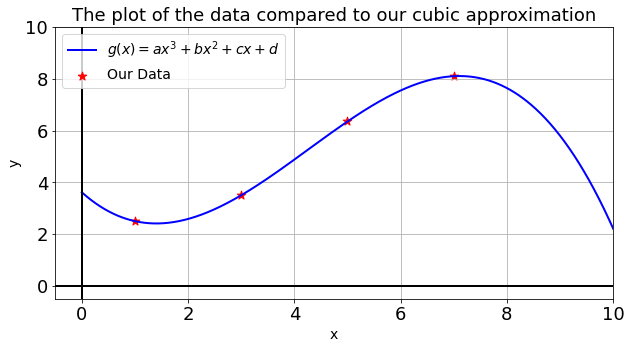

In [60]:
%matplotlib inline
#saving the figure in vector graphics format for better quality
%config InlineBachend.figure_format='svg' 


import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA

def cub_lsq(x,y):
    """
    This function returns the coefficients of the CUBIC regression AND the corresponding linear polyonomial
    of the given input data, x and y, in row or column vector form. It implements the CUBIC version of the Method 
    of Least Squares. It also displays a table where each row contains the x and y coordinates of the data, the 
    cubic function of the method of LSQ evaluated at that point and the absolute error of the best-fit cubic
    function and the data. We also display the total squared error at the end.
    """
    n = np.prod(x.shape)
    x = x.reshape(n,1) #if given otherwise, we turn x and y vectors to column vectors
    y = y.reshape(n,1)
    s_x = np.sum(x); s_x2 = np.sum(x**2); s_x3 = np.sum(x**3); s_x4 = np.sum(x**4); s_x5 = np.sum(x**5); s_x6 = np.sum(x**6)
    s_x3y = np.sum(x**3*y); s_x2y = np.sum(x**2*y); s_xy = np.sum(x*y); s_y = np.sum(y)
    S = np.array([[s_x6, s_x5, s_x4, s_x3], [s_x5, s_x4, s_x3, s_x2], [s_x4, s_x3, s_x2, s_x], [s_x3, s_x2, s_x, n]], float)
    r = np.array([s_x3y, s_x2y, s_xy, s_y], float)
    try:
        S_inv = LA.inv(S) # if LA.det(S)=0 then a LinAlgError exception will be raised
    except LA.LinAlgError:
        print("""With the given data, the system of normal equations of the Method of LSQ, does not have or 
                 has infinite solutions because the coefficient matrix, S, is singular, i.e. it doesnt have an inverse.""")
        return None
    else:
        sol = LA.solve(S,r)
        a = sol[0]; b = sol[1]; c = sol[2]; d = sol[3]
        g = np.poly1d([a,b,c,d])
        g_x = g(x)
        err = y-g_x
        print('|    x    |    y    |   g(x)  |   y-g(x) | \n ----------------------------------------')
        table = np.concatenate((x, y, g_x, err), axis=1)
        for (x_i, y_i, g_xi, err_i) in table:
            print(f'|  {x_i:5.2f}  |  {y_i:5.2f}  |  {g_xi:5.2f}  |  {err_i:6.2f}  |')
        print(f"Also the total squared error is {sum(err**2)[0]:.2f} \n")
        return (a,b,c,d), g


x = np.array([1, 3, 5, 7], int)
y = np.array([2.5, 3.5, 6.35, 8.1], float)
(a,b,c,d), g = cub_lsq(x,y)
print(f"The coefficients of the CUBIC polyonomial of the Method of LSQ are: a = {a:.2f}, b = {b:.2f}, c = {c:.2f} and d = {d:.2f}")
t = np.linspace(0,10, num=1000)
g_t = g(t)

print("""We see that our approximation interpolates our data, EXACTLY. As we see from the output table, the total squared 
error is 0, as well as the individual differences of the data and the approximations at each point (with a specific 
tolerance). That is attributed to the fact, like we explained at our theory overview at the beginning of this Jupyter 
Notebook, that the number of data points, (in this example 4=n+1) is exactly one above the degree of the polyonomial
approximation that we try to achieve with the Method of Least Squares. That is m=3=4-1=n. So in other words, in this
instance where m=3=4-1, the Method of Cubic Apprpximation is equivalent to the Legendre Method of Polyonomial 
Interpolation that we discussed briefly at the beginning!""")

# Creating the plot and editing some of its attributes for clarity. We will just copy and paste them for future use.
# We also assign every modification to our plot to a dummy/garbage collecting variable; '_' to prevent unwanted outputs

_ = plt.figure("Cubic approximation of our data", figsize=(10,5))
_ = plt.scatter(x, y , marker='*', c='red', s=80, label='Our Data')
_ = plt.plot(t, g_t, c='blue', linewidth='2.0', label=r'$g(x)=ax^3+bx^2+cx+d$')
_ = plt.xlabel('x', fontsize=14)
_ = plt.ylabel('y', fontsize=14)
_ = plt.grid(True)
axes = plt.gca() #gca stands for get current axes
axes.set_xlim([-0.5,10])
axes.set_ylim([-0.5,10])
_ = plt.rcParams['xtick.labelsize']=18
_ = plt.rcParams['ytick.labelsize']=18 
_ = plt.legend(loc='best', fontsize=14) #Sets the legend box at the best location
_ = plt.axhline(0, color='black', lw=2)
_ = plt.axvline(0, color='black', lw=2)
_ = plt.title("The plot of the data compared to our cubic approximation", 
              {'fontsize': 18,
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'center'} )
_ = plt.show

<hr style="border:2px solid gray"> </hr>

## Προσαρμογή δεδομένων με μη-πολυωνυμικές συναρτήσεις - Eκθετικές Προσεγγίσεις

Πολλές φόρες προκύπτει το ενδεχόμενο όπου δεν θέλουμε να προσαρμόσουμε πολυώνυμο στα δεδομένα μας και θα ήταν πιο βολικό σε αυτά να προσαρμόσουμε μια συνάρτηση που τα αντιπροσωπεύει καλύτερα και πιο αποτελεσματικά. Για παράδειγμα σε μια έρευνα που έγινε από το Indiana University Center for Studies of Law in Action το 2007 και δημοσιεύτηκε στο παγκόσμιο συνέδριο του ICADTS - The International Council on Alcohol, Drugs and Traffic Safety στο Seattle, USA, μελετήθηκε το ρίσκο αυτοκινητιστικού ατυχήματος υπό την επήρεια αλκοόλης. Δεδομένα από 2871 αυτοκινητιστικά ατυχήματα / δυστυχήματα χρησιμοποιήθηκαν ώστε να υπολογιστεί κατα πόσο συσχετίζεται η Συγκέντρωση Αλκοόλ στο αίμα (BAC – Blood Alcohol Concentration) με το ρίσκο να γίνει ένα αυτοκινητιστικό δυστήχημα. Ο παρακάτω πίνακας παρουσιάζει τα αποτελέσματα της έρευνας:

|  BAC  |     Relative Risk of crashing     |
| ----- | --------------------------------- |
|  0    |                 1                 |       
| 0.01  |                1.03               |
| 0.03  |                1.06               |
| 0.05  |                1.38               |
| 0.07  |                2.09               |
| 0.09  |                3.54               |
| 0.11  |                6.41               |
| 0.13  |                12.6               |
| 0.15  |                22.1               |
| 0.17  |                39.05              |
| 0.19  |                65.32              |
| 0.21  |                99.78              |

To *"Relative Risk"* είναι μια ποσότητα προδιορίζει το πόσες φορές πιο πιθανό είναι ένα άτομο υπο την καθορισμένη ποσότητα BAC να προκαλέσει αυτοκινητιστικό σε σύγκριση με ένα άτομο με *μηδενικό* BAC. Για παράδειγμα, ένα άτομο με 0.09 BAC είναι 3.54 φορές πιο πιθανό να προκαλέσει ένα αυτοκινητιστικό σε σύγκριση με ένα άτομο με 0 BAC. Εάν σχεδιάσουμε τα δεδομένα μας στο Καρτεσιανό επίπεδο με τον $x$-άξονα να αναπαριστά την στάθμη BAC ενώ ο $y$-άξονας να αναπαριστά το αντίστοιχο "relative risk" (σχετικό ρίσκο) παρατηρούμε ότι αυτά προσαρμόζονται ιδιαίτερα αποτελεσματικά απο μια **εκθετική συνάρτηση** (καλύτερα απότι θα τα προσέγγιζε ένα πολυώνυμο 2ου ή 3ου ή 4ου βαθμού) (**exponential regression**).

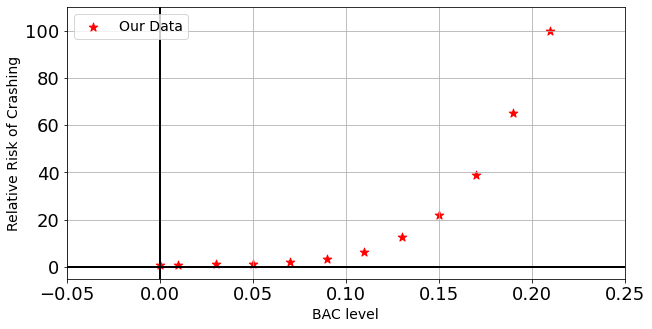

In [28]:
%matplotlib inline
%config InlineBachend.figure_format='svg' #saving the figure in vector graphics format for better quality

import matplotlib.pyplot as plt
import numpy as np

x = np.concatenate((np.array([0, 0.01], float), np.arange(0.03,0.23,0.02)),axis=0)
y = np.array([1, 1.03, 1.06, 1.38, 2.09, 3.54, 6.41, 12.6, 22.1, 39.05, 65.32, 99.78], float)

# Creating the plot and editing some of its attributes for clarity. We will just copy and paste them for future use.
# We also assign every modification to our plot to a dummy/garbage collecting variable; '_' to prevent unwanted outputs

_ = plt.figure(figsize=(10,5))
_ = plt.scatter(x,y , marker='*', c='red', s=80, label='Our Data')
_ = plt.xlabel('BAC level', fontsize=14)
_ = plt.ylabel('Relative Risk of Crashing', fontsize=14)
_ = plt.grid(True)
axes = plt.gca() #gca stands for get current axes
axes.set_xlim([-0.05,0.25])
axes.set_ylim([-5,110])
_ = plt.rcParams['xtick.labelsize']=18
_ = plt.rcParams['ytick.labelsize']=18 
_ = plt.legend(loc='upper left', fontsize=14) #Sets the legend box at the best location
_ = plt.axhline(0, color='black', lw=2)
_ = plt.axvline(0, color='black', lw=2)

_ = plt.show

Καθώς όπως βλέπουμε τα δεδομένα μας σχετίζονται με εκθετικό τρόπο τότε θέλουμε να βρούμε σταθερές $c$ και $a$, τέτοιες ώστε η εκθετική συνάρτηση $y=ce^{ax}$ να προσαρμόζει τα δεδομένα μας. Πάλι θα χρησιμοποιήσουμε (για καλή μας τύχη) στην $MATLAB$ την συνάρτηση την οποία δημιουργήσαμε, **lin_lsq()** ή για ευκολία την εντολή **polyfit()** με arguement στην παράμετρο του βαθμού του πολυωνύμου, τον αριθμό $1$. Υπενθυμίζουμε ότι όταν εάν $n+1$ είναι το πλήθος των δεδομένων μας τότε η συνάρτηση **polyfit(x,y,m)** της $MATLAB$ επιστρέφει το πoλυώνυμο βαθμού $m<n$ που προκύπτει από την **Μέθοδο Ελαχίστων Τετραγώνων**. Για να πάρουμε αυτές τις σταθερές $c$ και $a$, αρκεί να δώσουμε σαν arguements στην εντολή polyfit() τα διανύσματα $\vec{x} \text{ και } \ln{\vec{y}}$ και να ζητήσουμε το πολυώνυμο **1ου βαθμού** με το syntax:

$$
\text{polyfit(x,log(y),1)} \nonumber
$$

στην $MATLAB$. **Yπενθυμίζουμε ότι η συνάρτηση polyfit(), με την ίδια λειτουργικότητα, βρίσκεται και στο NumPy module της Python. Σε αυτό το παράδειγμα, αυτή θα χρησιμοποιήσουμε (για σκοπούς του παραδείγματος), αντί για την lin_lsq() που δημιουργήσαμε πιο πάνω στο Παράδειγμα 1**

Ο λόγος που αυτό λειτουργεί είναι απλός;

Εάν $y=ce^{ax}$ τότε,
$$
\ln{y} = \ln{ce^{ax}} \Rightarrow \overbrace{\ln{y}}^{Y} = \overbrace{\ln{c}}^{C} + ax \Leftrightarrow Y=ax+C \nonumber
$$

που μας λέει ότι θέλουμε να βρούμε ένα πολυώνυμο 1ου βαθμού, με την Μέθοδο Ελαχίστων Τετραγώνων για τα δεδομένα μας $(x,Y)=(x,\ln{y})$ και αυτό γιατι έχουμε βάσιμες πληροφορίες (κυρίως γεωμετρικές απο την αναπαράσταση των δεδομένων ή από προηγούμενες έρευνες που έγινας στο θέμα μας) ότι τα δεδομένα μας συσχετίζονται με εκθετικό τρόπο.

|    x    |    y    |   g(x)  |   y-g(x) | 
 ----------------------------------------
|   0.00  |   1.00  |   0.58  |    0.42  |
|   0.01  |   1.03  |   0.74  |    0.29  |
|   0.03  |   1.06  |   1.19  |   -0.13  |
|   0.05  |   1.38  |   1.92  |   -0.54  |
|   0.07  |   2.09  |   3.09  |   -1.00  |
|   0.09  |   3.54  |   4.97  |   -1.43  |
|   0.11  |   6.41  |   8.01  |   -1.60  |
|   0.13  |  12.60  |  12.89  |   -0.29  |
|   0.15  |  22.10  |  20.76  |    1.34  |
|   0.17  |  39.05  |  33.43  |    5.62  |
|   0.19  |  65.32  |  53.83  |   11.49  |
|   0.21  |  99.78  |  86.68  |   13.10  |
Also the total squared error is 343.25 

The coefficients of the exponential regression are: c = 0.58, a = 23.82


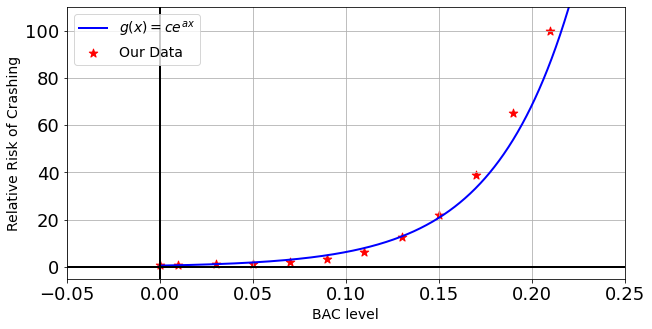

In [38]:
%matplotlib inline
%config InlineBachend.figure_format='svg' #saving the figure in vector graphics format for better quality

import matplotlib.pyplot as plt
import numpy as np

n = np.prod(x.shape)
x = np.concatenate((np.array([0, 0.01], float), np.arange(0.03,0.23,0.02)))
y = np.array([1, 1.03, 1.06, 1.38, 2.09, 3.54, 6.41, 12.6, 22.1, 39.05, 65.32, 99.78], float)
g = np.polyfit(x,np.log(y),1)
a = g[0]; upper_c = g[1]; c = np.exp(upper_c);
g_fun = lambda t: c*np.exp(a*t)
g_x = g_fun(x)
err = y-g_x
x = x.reshape(n,1)
y = y.reshape(n,1)
g_x = g_x.reshape(n,1)
err = err.reshape(n,1)
t = np.linspace(0,0.25,num=1000)
print('|    x    |    y    |   g(x)  |   y-g(x) | \n ----------------------------------------')
table = np.concatenate((x, y, g_x, err), axis=1)
for (x_i, y_i, g_xi, err_i) in table:
    print(f'|  {x_i:5.2f}  |  {y_i:5.2f}  |  {g_xi:5.2f}  |  {err_i:6.2f}  |')
print(f"Also the total squared error is {sum(err**2)[0]:.2f} \n")
print(f"The coefficients of the exponential regression are: c = {c:.2f}, a = {a:.2f}")

# Creating the plot and editing some of its attributes for clarity. We will just copy and paste them for future use.
# We also assign every modification to our plot to a dummy/garbage collecting variable; '_' to prevent unwanted outputs

_ = plt.figure(figsize=(10,5))
_ = plt.scatter(x,y , marker='*', c='red', s=80, label='Our Data')
_ = plt.plot(t, g_fun(t), c='blue', linewidth='2.0', label=r'$g(x)=ce^{ax}$')
_ = plt.xlabel('BAC level', fontsize=14)
_ = plt.ylabel('Relative Risk of Crashing', fontsize=14)
_ = plt.grid(True)
axes = plt.gca() #gca stands for get current axes
axes.set_xlim([-0.05,0.25])
axes.set_ylim([-5,110])
_ = plt.rcParams['xtick.labelsize']=18
_ = plt.rcParams['ytick.labelsize']=18 
_ = plt.legend(loc='upper left', fontsize=14) #Sets the legend box at the best location
_ = plt.axhline(0, color='black', lw=2)
_ = plt.axvline(0, color='black', lw=2)

_ = plt.show

<hr style="border:2px solid gray"> </hr>

## Προσαρμογή δεδομένων με μη-πολυωνυμικές συναρτήσεις - Κλασματικές Προσεγγίσεις

Πολλές είναι και οι περιπτώσεις όμως όπου τα δεδομένα μας μπορούν να προσαρμοστούν από μια κλασματική συνάρτηση (**reciprocal regression**) εαν υπάρχει κλασματική σχέση μεταξύ των δεδομένων (*reciprocal relation*). Δηλαδή εαν παρατηρήσουμε ότι τα δεδομένα μας συσχετίζονται με τέτοιο τρόπο τότε μπορούμε να τα προσεγγίσουμε, όχι με ένα πολυώνυμο, αλλά με ένα πηλίκο - κλασματική συνάρτηση της μορφής:

$$
y=\frac{1}{\gamma x+\delta} \nonumber
$$

Έστω τα πιο κάτω δεδομένα τα οποία προήρθαν από ένα σχολικό πείραμα, όπου οι μαθητές υπολόγιζαν την ισχύ μιας πηγής φωτός (intensity of light) σε candela (cd) σε συνάρτηση με την απόσταση από την πηγή φωτός σε inches ("):

|   d   |    i    |
|-------|---------|
|  30"  |  0.85 cd|
|  35"  |  0.67 cd|
|  40"  |  0.52 cd|
|  45"  |  0.42 cd|
|  50"  |  0.34 cd|
|  55"  |  0.28 cd|
|  60"  |  0.24 cd|
|  65"  |  0.21 cd|
|  70"  |  0.18 cd|
|  75"  |  0.15 cd|

Για να βρούμε μια τέτοια συνάρτηση, χρησιμοποιηούμε την ακόλουθη εντολή / συναρτήση με το καθορισμένο syntax, όπως είδαμε και στην Εκθετική Προσέγγιση, είτε στην Python είτε στην $MATLAB$:

$$
\text{Στην MATLAB: } polyfit(x,1./y,1) \\ \text{ και στην Python: } numpy.polyfit(x,1/y,1) \nonumber
$$

Ο λόγος που λειτουργεί αυτό, είναι και εδώ απλός:

Έστω $y=\frac{1}{\gamma x+\delta}$ τότε,

$$
\overbrace{\frac{1}{y}}^{Y} = \gamma x+\delta \Leftrightarrow Y=\gamma x+\delta \nonumber
$$

Άρα η εντολή θα μας δώσει το πολυώνυμο $\gamma x+\delta$ το οποίο χρησιμοποιούμε για την προσέγγιση των δεδομένων μας. **Μπορούμε φυσικά να προσεγγίσουμε τα δεδομένα μας και με κλασματικές συναρτήσεις όπου ο παρανομαστής του πηλίκου αποτελεί πολυώνυμο βαθμού μεγαλύτερου του $1$, απλά αλλάζοντας το arguement του βαθμού της προσέγγισης στο input της εντολής polyfit() στο ποθητό αριθμό.** Για παράδειγμα, για τα δεδομένα αυτού του πειράματος, θα δούμε ότι χρησιμοποιόντας **Quadratic** Reciprocal Regression με την Μέθοδο LSQ, επιτυγχάνουμε καλύτερα προσαρμογή και προσέγγιση των δεδομένων μας!

g_1(x)=γx+δ and g_2(x)=ax^2+bx+c 

|    x    |    y    |   g_1(x)  |   y-g_1(x) |   g_2(x)  |   y-g_2(x) | 
 ---------------------------------------------------------------------
|  30.00  |   0.85  |    1.27   |     -0.42  |     0.84  |      0.01  |
|  35.00  |   0.67  |    0.72   |     -0.05  |     0.66  |      0.01  |
|  40.00  |   0.52  |    0.51   |      0.01  |     0.52  |     -0.00  |
|  45.00  |   0.42  |    0.39   |      0.03  |     0.42  |     -0.00  |
|  50.00  |   0.34  |    0.32   |      0.02  |     0.34  |     -0.00  |
|  55.00  |   0.28  |    0.27   |      0.01  |     0.29  |     -0.01  |
|  60.00  |   0.24  |    0.23   |      0.01  |     0.24  |     -0.00  |
|  65.00  |   0.21  |    0.20   |      0.01  |     0.20  |      0.01  |
|  70.00  |   0.18  |    0.18   |     -0.00  |     0.18  |      0.00  |
|  75.00  |   0.15  |    0.16   |     -0.01  |     0.15  |     -0.00  |
The total squared error for the Linear reciprocal regression is 0.18 

The total squared error for th

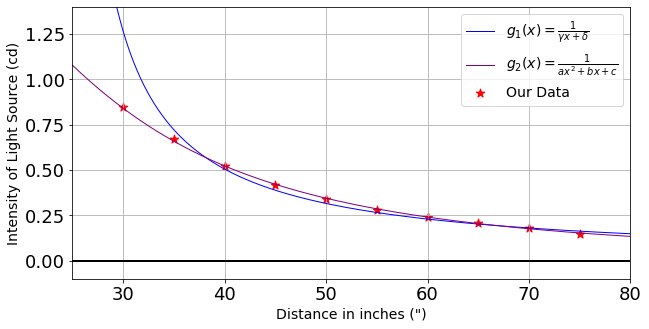

In [22]:
%matplotlib inline
%config InlineBachend.figure_format='svg' #saving the figure in vector graphics format for better quality

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(30, 80, 5)
y = np.array([0.85, 0.67, 0.52, 0.42, 0.34, 0.28, 0.24, 0.21, 0.18, 0.15], float)
n = np.prod(x.shape)
g_1 = np.polyfit(x,1/y,1)
g_2 = np.polyfit(x,1/y,2)
gamma = g_1[0]; delta = g_1[1]; a = g_2[0]; b = g_2[1]; c = g_2[2];
gfun_1 = lambda t: 1/(gamma*t+delta)
gfun_2 = lambda t: 1/(a*t**2+b*t+c)
g_1_x = gfun_1(x); g_2_x = gfun_2(x)
err_1 = y-g_1_x
err_2 = y-g_2_x
x = x.reshape(n,1)
y = y.reshape(n,1)
g_1_x = g_1_x.reshape(n,1)
g_2_x = g_2_x.reshape(n,1)
err_1 = err_1.reshape(n,1)
err_2 = err_2.reshape(n,1)
t = np.linspace(25,80,num=1000)
print("g_1(x)=γx+δ and g_2(x)=ax^2+bx+c \n")
print('|    x    |    y    |   g_1(x)  |   y-g_1(x) |   g_2(x)  |   y-g_2(x) | \n \
---------------------------------------------------------------------')
table = np.concatenate((x, y, g_1_x, err_1, g_2_x, err_2), axis=1)
for (x_i, y_i, g_1_xi, err_1_i, g_2_xi, err_2_i) in table:
    print(f'|  {x_i:5.2f}  |   {y_i:4.2f}  | {g_1_xi:7.2f}   |  {err_1_i:8.2f}  |  {g_2_xi:7.2f}  |  {err_2_i:8.2f}  |')
print(f"The total squared error for the Linear reciprocal regression is {sum(err_1**2)[0]:.2f} \n")
print(f"The total squared error for the Quadratic reciprocal regression is {sum(err_2**2)[0]:.6f} \n")
print(f"The coefficients of the LINEAR reciprocal regression are: γ = {gamma:.2f} and δ = {delta:.2f}")
print(f"The coefficients of the QUADRATIC reciprocal regression are: a = {a:.3f}, b = {b:.3f} and c = {c:.3f}")

# Creating the plot and editing some of its attributes for clarity. We will just copy and paste them for future use.
# We also assign every modification to our plot to a dummy/garbage collecting variable; '_' to prevent unwanted outputs

_ = plt.figure(figsize=(10,5))
_ = plt.scatter(x, y, marker='*', c='red', s=80, label='Our Data')
_ = plt.plot(t, gfun_1(t), c='blue', linewidth='1.0', label=r'$g_1(x)=\frac{1}{\gamma x+\delta}$')
_ = plt.plot(t, gfun_2(t), c='purple', linewidth='1.0', label=r'$g_2(x)=\frac{1}{ax^2+bx+c}$')
_ = plt.xlabel('Distance in inches (")', fontsize=14)
_ = plt.ylabel('Intensity of Light Source (cd)', fontsize=14)
_ = plt.grid(True)
axes = plt.gca() #gca stands for get current axes
axes.set_xlim([25,80])
axes.set_ylim([-0.1,1.4])
_ = plt.rcParams['xtick.labelsize']=18
_ = plt.rcParams['ytick.labelsize']=18 
_ = plt.legend(loc='best', fontsize=14) #Sets the legend box at the best location
_ = plt.axhline(0, color='black', lw=2)

_ = plt.show

<hr style="border:2px solid gray"> </hr>

## Παράδειγμα 3: Εφαρμογή όλων των μεθόδων που είδαμε σε ένα πρακτικό πρόβλημα.

Έστω ότι κατα την μοντελοποιήση μιας δεξαμενής πετρελαίου, μας αναθέτετε το έργο εύρεσης μια σχέσης μεταξύ την σταθερά ισορροπίας μιας (χημικής) αντίδρασης και της πίεσης, υπό μια σταθερή θερμοκρασία. Τα δεδομένα στον πιο κάτω πίνακα, συσχετίζουν τις σταθερές ισορροπίας (*K-values, Vapor-Liquid Equilibrium (VLE)*) με την πίεση (σε μονάδες ΚPSIA (1000 PSIA), δηλαδή σε μονάδες S.I.; $6.895E+6$ Pascal) και προέκυψαν απο μια πειραματική Pressure volume temperature (PVT) ανάλυση.

| Pressure | K-value |
|----------|---------|
|  0.635   |   7.5   |
|  1.035   |   5.58  |
|  1.435   |   4.35  |
|  1.835   |   3.55  |
|  2.235   |   2.97  |
|  2.635   |   2.53  |
|  3.035   |   2.2   |
|  3.435   |   1.93  |
|  3.835   |   1.7   |
|  4.235   |   1.46  |
|  4.635   |   1.28  |
|  5.035   |   1.11  |
|  5.435   |   1.0   |

Αναπαριστούμε τα δεδομένα μας και τα προσεγγίζουμε / προσαρμόζουμε με **6** διαφορετικές συναρτήσεις, αξιοποιώντας τα subplots της Matplotlib (εύκολα αυτό το πρόγραμμα στην Python μετατρέπεται σε Script m-file στην $MATLAB$). Tέλος, υπολογίζουμε και συγκρίνουμε, το συνολικό τετραγωνικό σφάλμα από την κάθε προσαρμογή, ώστα να παρθεί ποιά από τις πιο κάτω αποτελεί την best-fit καμπύλη για αυτό το συγκεκριμένο σύνολο δεδομένων.

1. Γραμμική Συνάρτηση / Πολυώνυμο βαθμού 1: $g_1(x)=mx+d$


2. Πολυώνυμο βαθμού 2: $g_2(x)=ax^2+bx+c$


3. Πολυώνυμο βαθμού 12 (=13-1, n=12): $g_3(x)=a_{12}x^{12}+ \cdots +a_1x+a_0$ 


4. Eκθετική συνάρτηση με βάση την σταθερά του Euler: $g_4(x)=re^{lx}$


5. Κλασματική συνάρτηση με γραμμική συνάρτηση στον παρονομαστή: $g_5(x)=\frac{1}{\lambda x+\delta}$


6. Κλασματική συνάρτηση με πολυώνυμο βαθμού 2 στον παρονομαστή: $g_6(x)=\frac{1}{\alpha x^2+\beta x+\gamma}$


The total squared errors for each regression are:

Linear Approximation of LSQ: 7.4816 

Quadratic Approximation of LSQ: 1.2917 

Polyonomial Interpolation (Lagrange Polyonomial): 0.0000 

Exponential Approximation of LSQ: 2.1353 

Linear Reciprocal Approximation of LSQ: 35.5787 <---- This is quite large because at approximately x=0.222... we have a horizontal asymptote 

Quadratic Reciprocal Approximation of LSQ: 0.5365 

The functions in the order we defined them: 

g_1(x)=-1.14x+6.32

g_2(x)=0.35x^2-3.25x+8.74

g_3(x)=0.001x^12-0.04x^11+0.69x^10-6.54x^9+40.54x^8-173.35x^7+522.95x^6-1118.31x^5+1677.27x^4-1715.58x^3+1134.53x^2-439.65x+83.19 

g_4(x)=7.96*exp(-0.40x) 

g_5(x)=1/(0.18*x-0.04) 

g_6(x)=1/(0.02*x^2+0.05*x+0.10) 



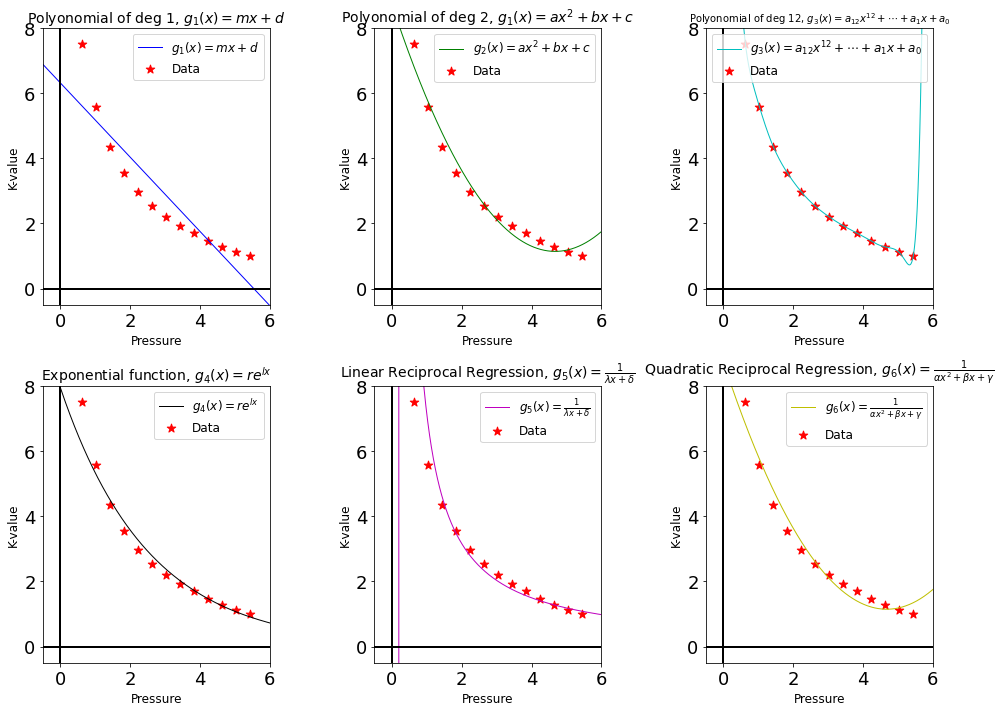

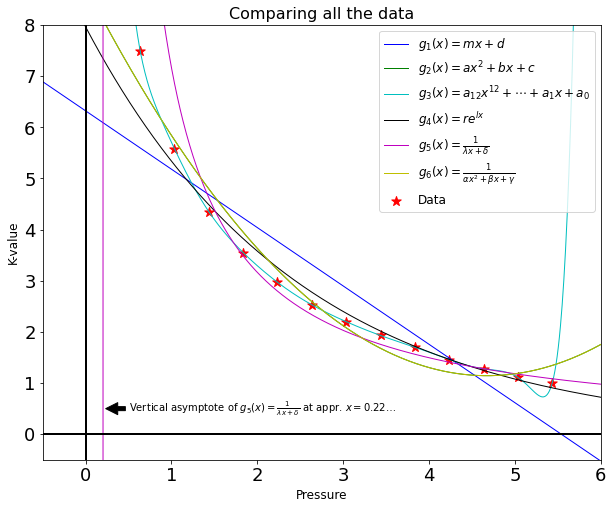

In [82]:
%matplotlib inline
%config InlineBachend.figure_format='svg' #saving the figure in vector graphics format for better quality

import matplotlib.pyplot as plt
import numpy as np
    
x = np.arange(0.635, 5.5, 0.4)
y = np.array([7.5, 5.58, 4.35, 3.55, 2.97, 2.53, 2.2, 1.93, 1.7, 1.46, 1.28, 1.11, 1.0], float)
n = np.prod(x.shape)
g_1 = np.polyfit(x,y,1)
g_2 = np.polyfit(x,y,2)
g_3 = np.polyfit(x,y,12)
# This, as we saw at the corresponding section, will need some tweaking first
g_4 = np.polyfit(x,np.log(y),1)
r = np.exp(g_4[1]); l = g_4[0]

g_5 = np.polyfit(x,1/y,1)
g_6 = np.polyfit(x,1/y,2)
gfun_exp = lambda t: r*np.exp(l*t)
gfun_rec1 = lambda t: 1/(g_5[0]*t+g_5[1])
gfun_rec2 = lambda t: 1/(g_6[0]*t**2+g_6[1]*t+g_6[2])

err_1 = y-np.polyval(g_1,x)
err_2 = y-np.polyval(g_2,x)
err_3 = y-np.polyval(g_3,x)
err_4 = y-gfun_exp(x)
err_5 = y-gfun_rec1(x)
err_6 = y-gfun_rec2(x)
print("The total squared errors for each regression are:\n")
print(f"Linear Approximation of LSQ: {sum(err_1**2):.4f} \n")
print(f"Quadratic Approximation of LSQ: {sum(err_2**2):.4f} \n")
print(f"Polyonomial Interpolation (Lagrange Polyonomial): {sum(err_3**2):.4f} \n")
print(f"Exponential Approximation of LSQ: {sum(err_4**2):.4f} \n")
print(f"Linear Reciprocal Approximation of LSQ: {sum(err_5**2):.4f} <---- This is quite large because at approximately \
x=0.222... we have a horizontal asymptote \n")
print(f"Quadratic Reciprocal Approximation of LSQ: {sum(err_6**2):.4f} \n")

# We could visualise these to be honest much better with the SymPy module but that could be a bit time consuming
print("The functions in the order we defined them: \n")
print(f"g_1(x)={g_1[0]:.2f}x+{g_1[1]:.2f}\n")
print(f"g_2(x)={g_2[0]:.2f}x^2{g_2[1]:.2f}x+{g_2[2]:.2f}\n")
print(f"g_3(x)={g_3[0]:.3f}x^12{g_3[1]:.2f}x^11+{g_3[2]:.2f}x^10{g_3[3]:.2f}x^9+{g_3[4]:.2f}x^8{g_3[5]:.2f}x^7+\
{g_3[6]:.2f}x^6{g_3[7]:.2f}x^5+{g_3[8]:.2f}x^4{g_3[9]:.2f}x^3+{g_3[10]:.2f}x^2{g_3[11]:.2f}x+{g_3[12]:.2f} \n")
print(f"g_4(x)={r:.2f}*exp({l:.2f}x) \n")
print(f"g_5(x)=1/({g_5[0]:.2f}*x{g_5[1]:.2f}) \n")
print(f"g_6(x)=1/({g_6[0]:.2f}*x^2+{g_6[1]:.2f}*x+{g_6[2]:.2f}) \n")

t = np.linspace(-0.5,6,num=1000)
#We change the figure size here instantly instead from the fig, Figure instance like we would do in a Python program
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(14,10)) 

axes[0,0].scatter(x,y, marker='*', c='red', s=80, label="Data")
axes[0,0].plot(t,np.polyval(g_1,t), '-b', linewidth=1.0, label=r'$g_1(x)=mx+d$')
axes[0,0].set_xlabel('Pressure', fontsize=12)
axes[0,0].set_ylabel('K-value', fontsize=12)
axes[0,0].legend(loc='best', fontsize=12)
axes[0,0].set_title(r"Polyonomial of deg 1, $g_1(x)=mx+d$", fontsize=14)
axes[0,0].axhline(0, color='black', lw=2)
axes[0,0].axvline(0, color='black', lw=2)
axes[0,0].set_xlim([-0.5,6])
axes[0,0].set_ylim([-0.5,8])

axes[0,1].scatter(x,y, marker='*', c='red', s=80, label="Data")
axes[0,1].plot(t,np.polyval(g_2,t), '-g', linewidth=1.0, label=r'$g_2(x)=ax^2+bx+c$')
axes[0,1].set_xlabel('Pressure', fontsize=12)
axes[0,1].set_ylabel('K-value', fontsize=12)
axes[0,1].legend(loc='best', fontsize=12)
axes[0,1].set_title(r"Polyonomial of deg 2, $g_1(x)=ax^2+bx+c$", fontsize=14)
axes[0,1].axhline(0, color='black', lw=2)
axes[0,1].axvline(0, color='black', lw=2)
axes[0,1].set_xlim([-0.5,6])
axes[0,1].set_ylim([-0.5,8])

axes[0,2].scatter(x,y, marker='*', c='red', s=80, label="Data")
axes[0,2].plot(t,np.polyval(g_3,t), '-c', linewidth=1.0, label=r'$g_3(x)=a_{12}x^{12}+ \cdots +a_1x+a_0$')
axes[0,2].set_xlabel('Pressure', fontsize=12)
axes[0,2].set_ylabel('K-value', fontsize=12)
axes[0,2].legend(loc='best', fontsize=12, mode='expand') #Because this is a really big legend box, we expand it horizontally
axes[0,2].set_title(r"Polyonomial of deg 12, $g_3(x)=a_{12}x^{12}+ \cdots +a_1x+a_0$", fontsize=10)
axes[0,2].axhline(0, color='black', lw=2)
axes[0,2].axvline(0, color='black', lw=2)
axes[0,2].set_xlim([-0.5,6])
axes[0,2].set_ylim([-0.5,8])

axes[1,0].scatter(x,y, marker='*', c='red', s=80, label="Data")
axes[1,0].plot(t,gfun_exp(t), '-k', linewidth=1.0, label=r'$g_4(x)=re^{lx}$')
axes[1,0].set_xlabel('Pressure', fontsize=12)
axes[1,0].set_ylabel('K-value', fontsize=12)
axes[1,0].legend(loc='best', fontsize=12)
axes[1,0].set_title(r"Exponential function, $g_4(x)=re^{lx}$", fontsize=14)
axes[1,0].axhline(0, color='black', lw=2)
axes[1,0].axvline(0, color='black', lw=2)
axes[1,0].set_xlim([-0.5,6])
axes[1,0].set_ylim([-0.5,8])

axes[1,1].scatter(x,y, marker='*', c='red', s=80, label="Data")
axes[1,1].plot(t,gfun_rec1(t), '-m', linewidth=1.0, label=r'$g_5(x)=\frac{1}{\lambda x+\delta}$')
axes[1,1].set_xlabel('Pressure', fontsize=12)
axes[1,1].set_ylabel('K-value', fontsize=12)
axes[1,1].legend(loc='best', fontsize=12)
axes[1,1].set_title(r"Linear Reciprocal Regression, $g_5(x)=\frac{1}{\lambda x+\delta}$", fontsize=14)
axes[1,1].axhline(0, color='black', lw=2)
axes[1,1].axvline(0, color='black', lw=2)
axes[1,1].set_xlim([-0.5,6])
axes[1,1].set_ylim([-0.5,8])

axes[1,2].scatter(x,y, marker='*', c='red', s=80, label="Data")
axes[1,2].plot(t,np.polyval(g_2,t), '-y', linewidth=1.0, label=r'$g_6(x)=\frac{1}{\alpha x^2+\beta x+\gamma}$')
axes[1,2].set_xlabel('Pressure', fontsize=12)
axes[1,2].set_ylabel('K-value', fontsize=12)
axes[1,2].legend(loc='best', fontsize=12)
axes[1,2].set_title(r"Quadratic Reciprocal Regression, $g_6(x)=\frac{1}{\alpha x^2+\beta x+\gamma}$", fontsize=14)
axes[1,2].axhline(0, color='black', lw=2)
axes[1,2].axvline(0, color='black', lw=2)
axes[1,2].set_xlim([-0.5,6])
axes[1,2].set_ylim([-0.5,8])

fig2, axis = plt.subplots(figsize=(10,8))
axis.scatter(x,y, marker='*', c='red', s=100, label="Data")
axis.plot(t,np.polyval(g_1,t), '-b', linewidth=1.0, label=r'$g_1(x)=mx+d$')
axis.plot(t,np.polyval(g_2,t), '-g', linewidth=1.0, label=r'$g_2(x)=ax^2+bx+c$')
axis.plot(t,np.polyval(g_3,t), '-c', linewidth=1.0, label=r'$g_3(x)=a_{12}x^{12}+ \cdots +a_1x+a_0$')
axis.plot(t,gfun_exp(t), '-k', linewidth=1.0, label=r'$g_4(x)=re^{lx}$')
axis.plot(t,gfun_rec1(t), '-m', linewidth=1.0, label=r'$g_5(x)=\frac{1}{\lambda x+\delta}$')
axis.plot(t,np.polyval(g_2,t), '-y', linewidth=1.0, label=r'$g_6(x)=\frac{1}{\alpha x^2+\beta x+\gamma}$')
axis.set_xlabel('Pressure', fontsize=12)
axis.set_ylabel('K-value', fontsize=12)
axis.legend(loc='best', fontsize=12)
axis.set_title("Comparing all the data", fontsize=16)
axis.axhline(0, color='black', lw=2)
axis.axvline(0, color='black', lw=2)
axis.set_xlim([-0.5,6])
axis.set_ylim([-0.5,8])
axis.annotate(r"Vertical asymptote of $g_5(x)=\frac{1}{\lambda x+\delta}$ at appr. $x=0.22\dots$", xy=(0.22,0.5),
              xytext=(0.5,0.5), xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05),
              horizontalalignment='left', verticalalignment='center') #Plotting an annotation for the asymptote of g_5(x)
    
fig.tight_layout()
plt.show()


<hr style="border:2px solid gray"> </hr>

## Μικρή συνοπτική ανασκόπιση της Συνεχούς Εκδοχής της Μεθόδου Ελαχίστων Τετραγώνων

Ξεκινήσαμε το Notebook μας, και *σχεδον* το κλείνουμε, με την μελέτη του προβλήματος προσαρμογής κάποιου συνόλου σημείων $\{(x_0,y_0),(x_1,y_1),\dots,(x_{n},y_{n})\}$ από ένα πολυώνυμο (ή εκθετική ή κλασματική συνάρτηση) βαθμού $m \leq n$. Mε άλλα λόγια, προσεγγίζαμε μια συνάρτηση $f \in \mathcal{C}[a,b]$ στα *διακριτά* σημεία $x_0,x_1,\dots,x_m$ μελετώντας την θεωρια και διαφορά παραδείγματα της **Διακριτής** εκδοχής ελαχίστων τετραγώνων. Όπως είχαμε αναφέρει στην αρχή του Notebook, (βλ. \eqref{eq:4} και \eqref{eq:5}), θα μπορούσαμε για τον ορισμό της συνάρτησης σφάλματος να χρησιμοποιούσαμε οποιοδήποτε άλλο μέγεθος θέλουμε για προσδιορισμό του σφάλματος της προσέγγισης από τα δεδομένα. Στην πραγματικότητα, και η επιλογή της προσέγγισης μιας συνάρτησης σε μόνο $n+1$ σημεία είναι κάπως αυθαίρετη. Εάν ήμασταν φιλόδοξοι, (αρκετά!) θα απαιτούσαμε από το πολυώνυμο της Μεθόδου των Ελαχίστων Τετραγώνων να προσαρμοζει / προσεγγίζει, σε υψηλο βαθμό, την συνάρτηση $f$ επί όλου του διαστήματος $[a,b]$. Πόσα σημεία θα διαλέγαμε τότε? (Δηλαδή τι τιμή θα έπαιρνε τότε το $n$? Προφανώς θα ήπρεπε να είναι αρκετά μεγάλη...) Με ποιό τρόπο θα διαλέγαμε τα σημεία $x_i$? Eύλογο θα ήτανε να κατανέμαμε τα σημεία $x_i \in [a,b]$ ομοιόμορφα επί του $[a,b]$ Δηλαδή παίρνουμε την **κανονική διαμέριση** του $[a,b]$ μεγέθους $n+1$;

$$
\text{Oρίζουμε: } h:=\frac{b-a}{n}  \text{ και έστω } x_k=a+kh, \forall k=0,1,\dots,n \nonumber
$$

Πίσω τώρα στην συνάρτηση σφάλματος, \eqref{eq:4}. Eαν πολλαπλασιάσουμε την συνάρτηση σφάλματος $Α(a_0,a_1,\dots,a_m)$, με την σταθερά $h$, η οποία είναι η απόσταση μεταξύ 2 διαδοχικών σημείων αυτής της κανονικής διαμέρισης του $[a,b]$ και πάρουμε το όριο της καθώς $n \to \infty$, δηλαδή προσπαθούμε να προσεγγίσουμε την συνάρτηση $f$ με το πολυώνυμο $g(x)$ (βαθμού $m$) σε όλο και περισσότερα σημεία, τότε η συνάρτηση $Α(a_0,a_1,\dots,a_m)$ παίρνει την μορφή ενός αθροίσματος Riemann. Δηλαδή το όριο της συνάρτησης $A$, καθώς $n \to \infty$ *προσεγγίζει* ένα ορισμένο ολοκλήρωμα:

$$
\lim_{n \to \infty} hΑ(a_0,a_1,\dots,a_m) = \lim_{n \to \infty} h \sum_{i=0}^n(g(x_i)-f(x_i))^2 = \int_a^b (g(x)-f(x))^2dx \nonumber
$$

Άρα σε αυτή την περίπτωση, όπου προσπαθούμε να μειώσουμε το σφάλμα μεταξύ της συνάρτησης και της προσέγγισης, επί άπειρα ομοιόμορφα κατανεμημενα σημεία, προσπαθούμε στην πραγματικότητα να ελαχιστοποιήσουμε ένα ολοκλήρωμα, αντί ένα άθροισμα πλέον. Θα δούμε ότι το πιο πάνω πρόβλημα ανάγεται σε πρόβλημα επίλυσης ενός γραμμικού συστήματος διάστασης, $(m+1) \times (m+1)$ αξιοποιώντας την θεωρία συναρτησιακών χώρων με εσωτερικό γινόμενο.

Είναι γνωστό ότι ο χώρος $\mathcal{C}[a,b]$, όπου είναι το σύνολο όλων των πραγματικών συναρτήσεων επί του $[a,b]$ όπου είναι *συνεχείς*, είναι **γραμμικός (διανυσματικός)**. Αυτό γιατί κάθε γραμμικός συνδυασμός, συνεχών συναρτήσεων επί του $[a,b]$, είναι με την σειρά του συνεχής συνάρτηση επί του $[a,b]$. Ορίζουμε τώρα το **εσωτερικό γινόμενο** 2 **πραγματικών** (για μιγαδικές συναρτήσεις, ορίζουμε το *γενικευμένο εσωτερικό γινόμενο*) συναρτήσεων, $f,g \in \mathcal{C}[a,b]$:

$$
\langle f,g \rangle = \int_a^b f(x)g(x)dx \tag{6} \label{eq:12}
$$

Όπως γνωρίζουμε από την Γραμμική Άλγεβρα, ένας γραμμικός (διανυσματικός) χώρος $V$, ονομάζεται *χώρος με εσωτερικό γινόμενο* εάν σε κάθε ζεύγος $(x,y) \in V \times V$ μπορούμε να αντιστοιχίσουμε ακριβώς ένα πραγματικό αριθμό $\langle x,y \rangle$ τέτοιος ώστε, $\forall x,y,z \in V \text{ και } \lambda \in \mathbb{R}$ να ισχύει: 

* $\langle \lambda x, y \rangle = \lambda \langle x,y \rangle$

* $\langle x+y,z \rangle = \langle x,z \rangle + \langle y,z \rangle$

* $\langle x,y \rangle = \langle y,x \rangle$

* $\langle x,x \rangle \geq 0 \text{ και } \langle x,x \rangle = 0 \Leftrightarrow x = 0_V$ 

Άρα θα αποδείξουμε τώρα ότι ικανοιποιούνται οι πιο πάνω 4 ιδιότητες στον γραμμικό χώρο $\mathcal{C}[a,b]$

* $\langle \lambda f,g \rangle \overset{\text{def.}}{=} \int_a^b \lambda f(x)g(x)dx = \lambda \int_a^b f(x)g(x)dx = \lambda \langle f,g \rangle$

* $\langle f+g,h \rangle \overset{\text{def.}}{=} \int_a^b [f(x)+g(x)]h(x)dx = \int_a^b f(x)h(x)dx +0 \int_a^b g(x)h(x)dx \overset{\text{def.}}{=} \langle f,h \rangle + \langle g,h \rangle$

* $\langle f,g \rangle = \langle g,f \rangle \text{, προφανώς}$

* $\langle f,f \rangle = \int_a^b f^2(x)dx \geq 0 \because f^2(x) \geq 0 \text{. Επίσης, } \langle f,f \rangle = \int_a^b f^2(x)dx = 0 \Leftrightarrow f(x) \equiv 0 \\ \text{ λόγω του ορισμού ολοκληρώματος (απόδειξη με άνω αθροίσματα Riemann και ορισμό ολοκληρωσιμότητας κατά Riemann)}$ 

Άρα ο διανυσματικός χώρος $\mathcal{C}[a,b]$ είναι χώρος με εσωτερικό γινόμενο. Επίσης ορίζουμε την $L^2$ ή Ευκλείδια νόρμα  και στο $\mathcal{C}[a,b]$ ως το μέγεθος:

$$
||f||_{L^2} := \langle f,f \rangle^{1/2} = \begin{pmatrix} \int_a^b f^2(x)dx \end{pmatrix}^{1/2} \tag{7} \label{eq:13}
$$

## Eλαχιστοποίηση Ελάχιστων Τετραγώνων με χρήση Απειροστικού Λογισμού

Έστω μια συνάρτηση, $f \in \mathcal{C}[a,b]$, η βασική $L^2$ προσέγγιση της, βασίζεται στην εύρεση ενός πολυωνύμου $g(x) \in \mathbb{R}_m[x]$ όπου ελαχιστοποιεί το σφάλμα $f-g$ στην Ευκλείδια νόρμα επί του $\mathcal{C}[a,b]$. Δηλαδή θέλουμε να βρούμε του συντελεστές του πολυωνύμου $g(x)$ όπου έχουμε:

$$
\min_{g(x) \in \mathbb{R}_m[x]} ||f-g||_{L^2} \equiv \min_{a_0,a_1,\dots,a_m \in \mathbb{R}} ||f-(a_mx^m+\cdots+a_1x+a_0)||_{L^2} \nonumber
$$

Έστω το πολυώνυμο που επιτυγχάνει αυτό το ελάχιστο; $\gamma(x)$. Θα δούμε πρώτα την περίπτωση $m=1$ και έπειτα την γενική περίπτωση. Καθώς η συνάρτηση $y=x^2$ είναι **αύξουσα** στο $\mathbb{R}^+$, τότε ισοδύναμα θα ελαχιστοποιήσουμε την συνάρτηση (2 μεταβλητών; $a_0,a_1$), $||f-g||_{L^2}^2$ καθώς:

$$
\underset{g(x) \in \mathbb{R}_m[x]}{arg \ min} \{||f-g||_{L^2}\} = \underset{g(x) \in \mathbb{R}_m[x]}{arg \ min} \{||f-g||_{L^2}^2\} \nonumber
$$

Άρα, $\forall g(x) \in \mathbb{R}_m[x]$, η συνάρτηση σφάλματος ορίζεται ώς:

\begin{align}
A(a_0,a_1):=||f(x)-a_0-a_1x||_{L^2}^2 &= \int_a^b (f(x)-a_0-a_1x)^2dx && \because \eqref{eq:13} \nonumber \\
                                      &= \int_a^b (f^2(x)-2f(x)(a_0+a_1x)+(a_0^2+2a_0a_1x+a_1^2x^2))dx \nonumber \\
                                      &= \int_a^b f^2(x)dx-2a_0\int_a^b f(x)dx-2a_1 \int_a^b xf(x)dx+a_0^2(b-a)+a_0a_1(b^2-a^2)+\frac{1}{3}a_1^2(b^3-a^3) \nonumber
\end{align}

Για να βρούμε το πολυώνυμο $\gamma (x)$, βρίσκουμε όπως και στην διακριτή Μέθοδο Ελαχίστων Τετραγώνων τις τιμές των $a_0,a_1$ όπου μηδενίζονται οι μερικές παραγώγοι $\frac{\partial A}{\partial a_0} \text{ και } \frac{\partial A}{\partial a_1}$. Πρώτα υπολογίζουμε αυτές τις παραγώγους:

$$
\frac{\partial A}{\partial a_0} = -2\int_a^b f(x)dx+2a_0(b-a)+a_1(b^2-a^2) \\
\frac{\partial A}{\partial a_1} = -2\int_a^b xf(x)dx+a_0(b^2-a^2)+\frac{2}{3} a_1(b^3-a^3) \nonumber
$$

Θέτοντας τις πιο πάνω ίσες με το 0, προκύπτει το ακόλουθο ισοδύναμο $2 \times 2$ γραμμικό σύστημα:

$$
\mathbf{M}\vec{\mathcal{a}}=\vec{d} \Leftrightarrow \tag{8} \label{eq:14}
\begin{pmatrix}
2(b-a) & b^2-a^2 \\
b^2-a^2 & \frac{2}{3}(b^3-a^3)
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1
\end{pmatrix}
=
\begin{pmatrix}
2\int_a^b f(x)dx \\
2\int_a^b xf(x)dx
\end{pmatrix}
$$

Προφανώς το πιο πάνω σύστημα έχει μοναδική λύση **αν.ν** $b \neq a$. Τότε εάν το πιο πάνω σύστημα έχει την λύση, $(\alpha_0,\alpha_1)$ τότε το ζητούμενο πολυώνυμο είναι το $\gamma (x)=\alpha_1 x+\alpha_0$, εκφραζόμενο ώς προς την κανονική βάση του πολυωνυμικού χώρου, $\mathbb{R}_m[x]$, όπου αποτελεί την **Συνεχής Γραμμική Προσέγγιση Ελαχίστων Τετραγώνων** της $f$ επί του $[a,b]$.

## Παράδειγμα εφαρμογής: Εφαρμόζουμε την μεθοδολογία μας στην $f(x)=\sin{x}$ επί του διαστήματος $[0,\pi/2]$

Έχουμε ότι $\int_0^{\pi/2} \sin{x}dx = [-\cos{x}]_{x=0}^{x=\pi/2} = 1$ και 
$\int_0^{\pi/2} x\sin{x}dx = [-x\cos{x}]_{x=0}^{x=\pi/2} + \int_0^{\pi/2} \cos{x}dx = 0 + [\sin{x}]_{x=0}^{x=\pi/2} = 1$. Άρα το σύστημα \eqref{eq:14} σε αυτή την περίπτωση είναι το:
$$
\begin{pmatrix}
\pi & \frac{\pi^2}{4} \\
\frac{\pi^2}{4} & \frac{\pi^3}{12}
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1
\end{pmatrix}
=
\begin{pmatrix}
2 \\
2
\end{pmatrix} \nonumber
$$

Το οποίο επιλύωντας το στην $MATLAB$ με την εντολή **linsolve()**, προκύπτουν οι συντελεστές του προσεγγιστικού πολυωνύμου όπως φαίνεται και πιο κάτω:



![Corrupted Image](cont_method_lsq_3.jpg "The MATLAB code")
![Corrupted Image](cont_method_lsq_2.jpg "The resulting figure")

Από το γράφημα βλέπουμε ότι η προσέγγιση μας είναι ικανοποιητική, όμως το σφάλμα δεν είναι και τόσο μικρο! Για την ακρίβεια, με ένα γρήγορο υπολογισμό απο την $MATLAB$ προκύπτει ότι: $||f-\gamma (x)||_{L^2}= 0.3544$

Στην $MATLAB$:

fun = @(x) (sin(x)-a(2)*x-a(1)).^2;

sqrt(integral(fun,0,pi/2))

ans =

    0.3544 

Όπως είδαμε και στην Διακριτή εκδοχή της Μεθόδου ελαχίστων τετραγώνων, αυξάνοντας τον βαθμό του προσεγγιστικού πολυωνύμου; $m$, μειώνεται το σφάλμα, $||f-\gamma (x)||_{L^2}$. Γενικά για να βρούμε το $L^2$-optimal βαθμού $m$ πολυωνύμο της συνεχής εκδοχής της Μεθόδου ελαχίστων τετραγώνων, θα πρέπει να λύσουμε ένα $(m+1) \times (m+1)$ γραμμικό σύστημα. 

## Γενίκευση της Συνεχής Μεθόδου Ελάχιστων Τετραγώνων για $m \in \mathbb{N}$

Στην γενίκευση της Συνεχόυς μεθόδου Ελ.Τ., θα επιχειρήσουμε κάτι διαφορετικό. Στο προηγούμενο παράδειγμα όπου $m=1$ εκφράσαμε το προσεγγίστικό πολυώνυμο που ελαχιστοποιεί την ποσότητα $||f-g(x)||_{L^2}$, $\gamma (x)$ ως προς την **κανονική βάση** του $\mathbb{R}_1[x]$, $\{1,x\}$. Τώρα θα κατασκευάσουμε μια μέθοδο εύρεσης του προσεγγίστικου πολυωνύμου $g(x) \in \mathbb{R}_m[x]$, εκφράζοντας το ως προς μια αυθαίρετη βάση του πολυωνυμικού χώρου, $\mathbb{R}_m[x]$, καθώς έτσι θα προκύψουν κάποιες σημαντικές αριθμητικές ιδιότητες προς όφελος μας, σε αυτό τον διαφορετικό προσεγγιστικό αλγόριθμο.

Έστω το σύνολο $\{q_0(x),q_1(x),\dots,q_m(x)\}$ αποτελεί μια βάση του $\mathbb{R}_m[x]$. Tότε, εξ ορισμού, προκύπτει ότι, $\forall g(x) \in \mathbb{R}_m[x]$:

$$
g(x)=\sum_{k=0}^m c_kq_k(x) \ , \ \text{ για κάποια } c_k \in \mathbb{R} \nonumber
$$

H συνάρτηση σφάλματος παίρνει την μορφή:

\begin{align}
A(c_0,\dots,c_m):=||f(x)-g(x)||^2_{L^2} &= \int_a^b (f(x) -\sum_{k=0}^m c_kq_k(x))^2dx \nonumber \\
                                        &= \langle f(x),f(x) \rangle -2\sum_{k=0}^m c_k\langle f(x),q_k(x) \rangle+\sum_{k=0}^m\sum_{l=0}^m c_kc_l\langle q_k(x),q_l(x) \rangle && \because \eqref{eq:12} \text{ and } \eqref{eq:13} \nonumber
\end{align}

Όπως και πριν υπολογίζουμε και θέτουμε τις μερικές παραγώγους, $\frac{\partial A}{\partial c_0},\dots,\frac{\partial A}{\partial c_m}$ ίσες με 0:

$$
\frac{\partial A}{\partial c_k}=-2\langle f(x),q_k(x) \rangle+\sum_{l=0}^m 2c_k\langle q_l(x),q_k(x) \rangle, \ \forall k=0,\dots,m \\ \xrightarrow[\text{gives us the m+1 equations}]{setting \ \frac{\partial A}{\partial c_k}=0} 
\langle f(x),q_k(x) \rangle = \sum_{l=0}^m c_k\langle q_l(x),q_k(x) \rangle, \ \forall k=0,\dots,m  \nonumber
$$

Aυτό είναι σε συμπαγές μορφή το γραμμικό σύστημα:

$$
\begin{pmatrix}
\langle q_0(x),q_0(x) \rangle & \langle q_0(x),q_1(x) \rangle & \cdots & \langle q_0(x),q_m(x) \rangle \\
\langle q_1(x),q_0(x) \rangle & \langle q_1(x),q_1(x) \rangle & \cdots & \langle q_1(x),q_m(x) \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle q_m(x),q_0(x) \rangle & \langle q_m(x),q_1(x) \rangle & \cdots & \langle q_m(x),q_m(x) \rangle
\end{pmatrix}
\begin{pmatrix}
c_0 \\
c_1 \\
\vdots \\
c_m
\end{pmatrix}
= 
\begin{pmatrix}
\langle f(x),q_0(x) \rangle \\
\langle f(x),q_1(x) \rangle \\
\vdots \\
\langle f(x),q_m(x) \rangle
\end{pmatrix} \nonumber
$$

Το πιο πάνω συνήθως το συμβολίζουμε για οικονομία, $\mathbf{H} \vec{c} = \vec{b}$ του οποίου η επίλυση του επιφέρει του συντελεστές του πολυωνύμου, $\gamma (x)=c_mq_m(x)+\cdots+c_1q_1(x)+a_0q_0(x)$ **ΕΚΦΡΑΖΌΜΕΝΟ ΣΤΗΝ ΑΥΘΑΊΡΕΤΗ ΒΆΣΗ ΤΟΥ $\mathbb{R}_m[x]$, $\{q_0(x),q_1(x),\dots,q_m(x)\}$** το οποίο ελαχιστοποιεί την $L^2$-νόρμα, $||f-g(x)||_{L^2}$, δηλαδή επιτυγχάνει το $\min_{g(x) \in \mathbb{R}_m[x]} ||f-g||_{L^2}$

Εύλογο ερώτημα είναι τώρα γιατί χρησιμοποιήσαμε, μια αυθαίρετη βάση του $\mathbb{R}_m[x]$, αντί την κανονική βάση, $\{1,x,x^2,\dotsm,x^m\}$? Aς εφαρμόσουμε την γενικευμένη μας μέθοδο στο διάστημα $[0,1]$ με την κανονική βάση; $q_k(x)=x^k$. Τότε:

$$
\langle q_l(x),q_k(x) \rangle = \langle x^l,x^k \rangle = \int_0^1 x^{k+l}dx = \frac{1}{k+l+1} \nonumber
$$

Με άλλα λόγια:

$$
\mathbf{H}:=(h_{kl})_{k,l=0}^m=\frac{1}{k+l+1} \equiv \text{ Τετραγωνικός Πίνακας Hilbert τάξης (m+1).} \nonumber
$$

Eίναι γνωστοί οι πίνακες Hilbert για την κακή τους στάθμη κατάστασης, με αποτέλεσμα να είναι ειδικά δύσκολο να βρούμε ακριβές λύσεις στα συστήματα μας όπου έχουν ως πίνακα συντελεστών αυτούς, ειδικά όταν ο αριθμός $m$ είναι μεγάλος (μονο για $m=5$ , $\kappa(\mathbf{H})=1.495 \times 10^7$ !!). **Αυτό επιβεβαιώνει το γεγονός ότι, η επιλογή της κανονικής βάσης του $\mathbb{R}_m[x]$, επί το $[0,1]$ είναι κακή ιδέα..**

<hr style="border:2px solid gray"> </hr> <center><b>ΤΕΛΟΣ NOTEBOOK</b></center> <hr style="border:2px solid gray"> </hr>